# Loading dataset

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import joblib
from nltk.tokenize import RegexpTokenizer
import nltk
from imblearn.combine import SMOTETomek

nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aashika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import numpy as np # linear algebra
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
jobdata = pd.read_csv("fake_job_postings.csv");
jobdata.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
jobdata.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
jobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
jobdata.shape

(17880, 18)

In [9]:
jobdata.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [10]:
jobdata.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
jobdata.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [12]:
#Dropping 'job_id' as it is irrelevant to fraudulent
text_features = ['title', 'company_profile', 'description', 'requirements', 'benefits']
complex_features = ['location', 'salary_range']
bin_features = ['telecommuting', 'has_company_logo', 'has_questions']
cat_features = ['department', 'employment_type', 'required_experience', 
                'required_education', 'industry', 'function']

In [13]:
jobdata.describe(include='all').loc['unique', :]

job_id                   NaN
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting            NaN
has_company_logo         NaN
has_questions            NaN
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent               NaN
Name: unique, dtype: object

In [14]:
jobdata["company_profile"].unique

<bound method Series.unique of 0        We're Food52, and we've created a groundbreaki...
1        90 Seconds, the worlds Cloud Video Production ...
2        Valor Services provides Workforce Solutions th...
3        Our passion for improving quality of life thro...
4        SpotSource Solutions LLC is a Global Human Cap...
                               ...                        
17875    Vend is looking for some awesome new talent to...
17876    WebLinc is the e-commerce platform and service...
17877    We Provide Full Time Permanent Positions for m...
17878                                                  NaN
17879    Vend is looking for some awesome new talent to...
Name: company_profile, Length: 17880, dtype: object>

# Handling string data columns

In [15]:
df_string=jobdata.copy()
df_string[df_string.columns].isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [16]:
df_string.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [17]:
df_string.isna().sum().sum()

70103

In [18]:
df_string['location']=df_string['title'].replace(np.nan, '', regex=True)
df_string['department']=df_string['title'].replace(np.nan, '', regex=True)
df_string['salary_range']=df_string['title'].replace(np.nan, '', regex=True)
df_string['company_profile']=df_string['title'].replace(np.nan, '', regex=True)
df_string['description']=df_string['title'].replace(np.nan, '', regex=True)
df_string['requirements']=df_string['title'].replace(np.nan, '', regex=True)
df_string['benefits']=df_string['title'].replace(np.nan, '', regex=True)

In [19]:
df_string['text'] = df_string[['title', 'department','company_profile','description','requirements','benefits']].apply(lambda x: ' '.join(x), axis = 1)

In [20]:
df_string.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,1,Marketing Intern,Marketing Intern,Marketing Intern,Marketing Intern,Marketing Intern,Marketing Intern,Marketing Intern,Marketing Intern,0,1,0,Other,Internship,NaN,NaN,Marketing,0,Marketing Intern Marketing Intern Marketing In...
1,2,Customer Service - Cloud Video Production,Customer Service - Cloud Video Production,Customer Service - Cloud Video Production,Customer Service - Cloud Video Production,Customer Service - Cloud Video Production,Customer Service - Cloud Video Production,Customer Service - Cloud Video Production,Customer Service - Cloud Video Production,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,Customer Service - Cloud Video Production Cust...
2,3,Commissioning Machinery Assistant (CMA),Commissioning Machinery Assistant (CMA),Commissioning Machinery Assistant (CMA),Commissioning Machinery Assistant (CMA),Commissioning Machinery Assistant (CMA),Commissioning Machinery Assistant (CMA),Commissioning Machinery Assistant (CMA),Commissioning Machinery Assistant (CMA),0,1,0,NaN,NaN,NaN,NaN,NaN,0,Commissioning Machinery Assistant (CMA) Commis...
3,4,Account Executive - Washington DC,Account Executive - Washington DC,Account Executive - Washington DC,Account Executive - Washington DC,Account Executive - Washington DC,Account Executive - Washington DC,Account Executive - Washington DC,Account Executive - Washington DC,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Account Executive - Washington DC Account Exec...
4,5,Bill Review Manager,Bill Review Manager,Bill Review Manager,Bill Review Manager,Bill Review Manager,Bill Review Manager,Bill Review Manager,Bill Review Manager,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Bill Review Manager Bill Review Manager Bill R...


In [21]:
df_string.drop(['job_id', 'location','title','salary_range' ,'department','salary_range','company_profile','description','requirements','benefits'], axis=1, inplace=True)

In [22]:
df_string.columns
df_string_columns = df_string.columns.tolist()
print(df_string_columns)

['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent', 'text']


In [23]:
df_string_columns = df_string_columns[-1:] + df_string_columns[:-1]
df_string = df_string[df_string_columns]
df_string.head()

,text,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern Marketing Intern Marketing In...,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production Cust...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA) Commis...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC Account Exec...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager Bill Review Manager Bill R...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [24]:
def clean_text(text, ):
        if text is not None:
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
                text = re.sub(r'[0-9]+','',text)
                text =  text.lower()
                text = re.sub('re:', '', text)
                text = re.sub('-', '', text)
                text = re.sub('_', '', text)
                text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
                text = re.sub(r'\S*@\S*\s?', '', text, flags=re.MULTILINE)
        # Remove text between square brackets
                text =re.sub('\[[^]]*\]', '', text)
        # removes punctuation
                text = re.sub(r'[^\w\s]','',text)
                text = re.sub(r'\n',' ',text)
                text = re.sub(r'[0-9]+','',text)
                #text = re.sub(r'[0-9]+','',text)
        # strip html 
                p = re.compile(r'<.*?>')
                text = re.sub(r"\'ve", " have ", text)
                text = re.sub(r"can't", "cannot ", text)
                text = re.sub(r"n't", " not ", text)
                text = re.sub(r"I'm", "I am", text)
                text = re.sub(r" m ", " am ", text)
                text = re.sub(r"\'re", " are ", text)
                text = re.sub(r"\'d", " would ", text)
                text = re.sub(r"\'ll", " will ", text)
        
                text = p.sub('', text)

        def tokenize_text(text,tokenizer=default_tokenizer):
            token = default_tokenizer.tokenize(text)
            return token
        
        def remove_stopwords(text, stop_words=default_stopwords):
            tokens = [w for w in tokenize_text(text) if w not in stop_words]
            return ' '.join(tokens)

        def stem_text(text, stemmer=default_stemmer):
            tokens = tokenize_text(text)
            return ' '.join([stemmer.stem(t) for t in tokens])

        text = stem_text(text) # stemming
        text = remove_stopwords(text) # remove stopwords
        #text.strip(' ') # strip whitespaces again?

        return text

In [25]:
df_string['text'] = df_string['text'].apply(clean_text)

In [26]:
df_string['text'].head()

0    market intern market intern market intern mark...
1    custom servic cloud video product custom servi...
2    commiss machineri assist cma commiss machineri...
3    account execut washington dc account execut wa...
4    bill review manag bill review manag bill revie...
Name: text, dtype: object

In [27]:
cv = TfidfVectorizer(max_features = 100)
x = cv.fit_transform(df_string['text'])
dftext = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())

In [28]:
df_string.drop(["text"], axis=1, inplace=True)

In [29]:
df_string= pd.concat([dftext, df_string], axis=1)

In [30]:
df_string.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,year,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Handling complex columns

In [31]:
#splitting salary
salary_range = jobdata.salary_range.copy()

In [32]:
salary_range.unique()

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '45000-50000', '30000-37000',
       '45000-67000', '35000-100000', '180000-216000', '45000-65000',
       '28000-32000', '0-1000', '36000-40000', '80000-110000',
       '35000-73000', '19000-19000', '60000-120000', '120000-15000000',
       '42000-55000', '90000-120000', '100000-150000', '28000-38000',
       '1600-1700', '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '1300

In [33]:
salary_range.fillna('111110-111111', inplace=True)
salary_range_sep = list(salary_range.str.split('-').values)
salary_range_sep[5538] = ['40000', '40000']
error_range_inds = []
for range_ind, s_range in enumerate(salary_range_sep):
    min_value, max_value = s_range
    if not min_value.isdigit() or not max_value.isdigit():
        error_range_inds += [range_ind]
for range_ind in error_range_inds:
    salary_range_sep[range_ind] = ['0', '0']
data_salary_range = pd.DataFrame(np.array(salary_range_sep, dtype='int64'), 
                                 columns=['min_salary', 'max_salary'])

num_features = ['min_salary', 'max_salary']
df_salary = pd.concat([df_string, data_salary_range], axis=1)

In [34]:
df_salary.replace(111110,np.nan, inplace=True)
print(df_salary['min_salary'].isna().sum())
df_salary.replace(111111,np.nan, inplace=True)
print(df_salary['max_salary'].isna().sum())

15012
15012


In [35]:
df_salary.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,Other,Internship,NaN,NaN,Marketing,0,NaN,NaN
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN


In [36]:
#Splitting locations
location = jobdata['location'].copy()

In [37]:
location.unique()

array(['US, NY, New York', 'NZ, , Auckland', 'US, IA, Wever', ...,
       'US, CA, los Angeles', 'CA, , Ottawa', 'GB, WSX, Chichester'],
      dtype=object)

In [38]:
#splitting location
location_splitted = list(location.str.split(', ').values)
for loc_ind, loc in enumerate(location_splitted):
    if loc is np.nan:
        location_splitted[loc_ind] = ['Unspecified'] * 3
    else:
        for el_ind, el in enumerate(loc):
            if el == '':
                loc[el_ind] = 'Unspecified'
                
location_splitted = list(map(lambda loc: list(loc), location_splitted))
for loc_ind, loc in enumerate(location_splitted):
    if len(loc) > 3:
        location_splitted[loc_ind] = loc[:2] + [', '.join(loc[2:])]
    if len(loc) < 3:
        location_splitted[loc_ind] += ['Unspecified'] * 2
        
data_location = pd.DataFrame(location_splitted, columns=['country', 'state', 'city'])
cat_features += ['country', 'state', 'city']
df=pd.concat([df_salary, data_location], axis=1)
df.replace('Unspecified', np.nan, inplace=True)
df.head()


,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,NaN,NaN,Marketing,0,NaN,NaN,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NZ,NaN,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,US,FL,Fort Worth


In [39]:
df

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Internship,NaN,NaN,Marketing,0,NaN,NaN,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NZ,NaN,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,US,FL,Fort Worth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0.0,0.677457,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Mid-Senior level,NaN,Computer Software,Sales,0,NaN,NaN,CA,ON,Toronto
17876,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,NaN,NaN,US,PA,Philadelphia
17877,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,US,TX,Houston
17878,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Not Applicable,Professional,Graphic Design,Design,0,NaN,NaN,NG,LA,Lagos


In [40]:
df.isna().sum()

abroad            0
account           0
admin             0
administr         0
agent             0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

# Categorical NaN values filled with empty string and numerical with 0

In [41]:
df1=df.copy()
df1['employment_type'].fillna("", inplace=True)
df1['required_experience'].fillna("", inplace=True)
df1['required_education'].fillna("", inplace=True)
df1['industry'].fillna("", inplace=True)
df1['function'].fillna("", inplace=True)
df1['min_salary'].fillna(0, inplace=True)
df1['max_salary'].fillna(0, inplace=True)
df1['country'].fillna("", inplace=True)
df1['state'].fillna("", inplace=True)
df1['city'].fillna("", inplace=True)
df1.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,,,Marketing,0,0.0,0.0,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,,Marketing and Advertising,Customer Service,0,0.0,0.0,NZ,,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,,,,,0,0.0,0.0,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0.0,0.0,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0.0,0.0,US,FL,Fort Worth


In [42]:
df1.isna().sum()

abroad        0
account       0
admin         0
administr     0
agent         0
             ..
min_salary    0
max_salary    0
country       0
state         0
city          0
Length: 114, dtype: int64

In [43]:
df1.isna().sum().sum()

0

# Label Encoding

In [44]:
df1['fraudulent']=df1['fraudulent'].astype('category')
print(df1.dtypes)

abroad        float64
account       float64
admin         float64
administr     float64
agent         float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object


In [45]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df1['employment_type'] = lb_make.fit_transform(df1['employment_type'])
df1['required_experience'] = lb_make.fit_transform(df1['required_experience'])
df1['required_education'] = lb_make.fit_transform(df1['required_education'])
df1['industry'] = lb_make.fit_transform(df1['industry'])
df1['function'] = lb_make.fit_transform(df1['function'])
df1['country']=lb_make.fit_transform(df1['country'])
df1['state']=lb_make.fit_transform(df1['state'])
df1['city']=lb_make.fit_transform(df1['city'])
df1.head() #Results in appending a new column to df

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,0,0,23,0,0.0,0.0,86,228,1458
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7,0,76,8,0,0.0,0.0,61,0,189
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0.0,86,156,2213
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,2,23,32,0,0.0,0.0,86,105,2164
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,2,52,17,0,0.0,0.0,86,131,787


In [46]:
df1.dtypes

abroad        float64
account       float64
admin         float64
administr     float64
agent         float64
               ...   
min_salary    float64
max_salary    float64
country         int32
state           int32
city            int32
Length: 114, dtype: object

In [47]:
X_ = df1.drop(['fraudulent'], axis=1)
X_col = X_.columns
y_ = df1['fraudulent']

In [48]:
df1

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,5,0,0,23,0,0.0,0.0,86,228,1458
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,7,0,76,8,0,0.0,0.0,61,0,189
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0.0,0.0,86,156,2213
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,6,2,23,32,0,0.0,0.0,86,105,2164
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,6,2,52,17,0,0.0,0.0,86,131,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0.0,0.677457,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,6,0,23,32,0,0.0,0.0,13,235,2082
17876,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,6,2,62,1,0,0.0,0.0,86,239,1630
17877,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,0.0,0.0,86,289,976
17878,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,7,7,49,10,0,0.0,0.0,57,176,1115


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y_,
                                                    train_size=0.8,
                                                    random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,
                                                    train_size=0.8,
                                                    random_state=42)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(11443, 113)
(3576, 113)
(2861, 113)


In [51]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("\nTest Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

# KNN before preprocessing

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn.fit(X_train, y_train)
print_score(knn, X_train, X_validation, y_train, y_validation, train=True)
print_score(knn, X_train, X_validation, y_train, y_validation, train=False)


Train Result:

accuracy score: 0.9663

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     10910
           1       0.79      0.38      0.51       533

    accuracy                           0.97     11443
   macro avg       0.88      0.69      0.75     11443
weighted avg       0.96      0.97      0.96     11443


Confusion Matrix: 
 [[10857    53]
 [  333   200]]

ROC AUC: 0.6852

Average Accuracy: 	 0.9588
Accuracy SD: 		 0.0031

Test Result:

accuracy score: 0.9602

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.74      0.39      0.51       152

    accuracy                           0.96      2861
   macro avg       0.85      0.69      0.74      2861
weighted avg       0.95      0.96      0.95      2861


Confusion Matrix: 
 [[2688   21]
 [  93   59]]

ROC AUC: 0.6902



# Random Forest before preprocessing

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
print_score(rf, X_train, X_validation, y_train, y_validation, train=True)
print_score(rf, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9780
Accuracy SD: 		 0.0036

Test Result:

accuracy score: 0.9780

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.95      0.62      0.75       152

    accuracy                           0.98      2861
   macro avg       0.96      0.81      0.87      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2704    5]
 [  58   94]]

ROC AUC: 0.8083



# Decision Tree before preprocessing

In [54]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree.fit(X_train, y_train)
print_score(Tree, X_train, X_validation, y_train, y_validation, train=True)
print_score(Tree, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9831

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10910
           1       0.95      0.68      0.79       533

    accuracy                           0.98     11443
   macro avg       0.97      0.84      0.89     11443
weighted avg       0.98      0.98      0.98     11443


Confusion Matrix: 
 [[10890    20]
 [  173   360]]

ROC AUC: 0.8368

Average Accuracy: 	 0.9664
Accuracy SD: 		 0.0029

Test Result:

accuracy score: 0.9664

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2709
           1       0.75      0.56      0.64       152

    accuracy                           0.97      2861
   macro avg       0.86      0.77      0.81      2861
weighted avg       0.96      0.97      0.96      2861


Confusion Matrix: 
 [[2680   29]
 [  67   85]]

ROC AUC: 0.7743



# Gradient Boosting before preprocessing

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
print_score(gb, X_train, X_validation, y_train, y_validation, train=True)
print_score(gb, X_train, X_validation, y_train, y_validation, train=False)


Train Result:

accuracy score: 0.9715

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     10910
           1       0.96      0.40      0.57       533

    accuracy                           0.97     11443
   macro avg       0.97      0.70      0.78     11443
weighted avg       0.97      0.97      0.97     11443


Confusion Matrix: 
 [[10902     8]
 [  318   215]]

ROC AUC: 0.7013

Average Accuracy: 	 0.9654
Accuracy SD: 		 0.0044

Test Result:

accuracy score: 0.9657

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.91      0.39      0.55       152

    accuracy                           0.97      2861
   macro avg       0.94      0.70      0.77      2861
weighted avg       0.96      0.97      0.96      2861


Confusion Matrix: 
 [[2703    6]
 [  92   60]]

ROC AUC: 0.6963



# SVM before preprocessing

In [51]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, y_train)
print_score(SVM, X_train, X_validation, y_train, y_validation, train=True)
print_score(SVM, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9534

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     10910
           1       0.00      0.00      0.00       533

    accuracy                           0.95     11443
   macro avg       0.48      0.50      0.49     11443
weighted avg       0.91      0.95      0.93     11443


Confusion Matrix: 
 [[10910     0]
 [  533     0]]

ROC AUC: 0.5000

Average Accuracy: 	 0.9534
Accuracy SD: 		 0.0004

Test Result:

accuracy score: 0.9469

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       0.00      0.00      0.00       152

    accuracy                           0.95      2861
   macro avg       0.47      0.50      0.49      2861
weighted avg       0.90      0.95      0.92      2861


Confusion Matrix: 
 [[2709    0]
 [ 152    0]]

ROC AUC: 0.5000



# Bagging before preprocessing

In [52]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=Tree, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
print(bag_clf.oob_score_)
print_score(bag_clf, X_train, X_validation, y_train, y_validation, train=True)
print_score(bag_clf, X_train, X_validation, y_train, y_validation, train=False)

0.9735209298260945
Train Result:

accuracy score: 0.9836

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10910
           1       1.00      0.65      0.79       533

    accuracy                           0.98     11443
   macro avg       0.99      0.82      0.89     11443
weighted avg       0.98      0.98      0.98     11443


Confusion Matrix: 
 [[10910     0]
 [  188   345]]

ROC AUC: 0.8236

Average Accuracy: 	 0.9730
Accuracy SD: 		 0.0035

Test Result:

accuracy score: 0.9717

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.94      0.50      0.65       152

    accuracy                           0.97      2861
   macro avg       0.96      0.75      0.82      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2704    5]
 [  76   76]]

ROC AUC: 0.7491



# XGBoost

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
print_score(xgb, X_train, X_validation, y_train, y_validation, train=True)
print_score(xgb, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9673

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     10910
           1       0.96      0.31      0.47       533

    accuracy                           0.97     11443
   macro avg       0.96      0.66      0.73     11443
weighted avg       0.97      0.97      0.96     11443


Confusion Matrix: 
 [[10903     7]
 [  367   166]]

ROC AUC: 0.6554

Average Accuracy: 	 0.9644
Accuracy SD: 		 0.0034

Test Result:

accuracy score: 0.9636

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2709
           1       0.96      0.33      0.49       152

    accuracy                           0.96      2861
   macro avg       0.96      0.66      0.74      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2707    2]
 [ 102   50]]

ROC AUC: 0.6641



# Logistic regression before preprocessing

In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)
print_score(model, X_train, X_validation, y_train, y_validation, train=True)
print_score(model, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9534

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     10910
           1       0.00      0.00      0.00       533

    accuracy                           0.95     11443
   macro avg       0.48      0.50      0.49     11443
weighted avg       0.91      0.95      0.93     11443


Confusion Matrix: 
 [[10910     0]
 [  533     0]]

ROC AUC: 0.5000

Average Accuracy: 	 0.9532
Accuracy SD: 		 0.0006

Test Result:

accuracy score: 0.9465

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       0.00      0.00      0.00       152

    accuracy                           0.95      2861
   macro avg       0.47      0.50      0.49      2861
weighted avg       0.90      0.95      0.92      2861


Confusion Matrix: 
 [[2708    1]
 [ 152    0]]

ROC AUC: 0.4998



# MultiLayer Perceptron Classifier

In [55]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=1, max_iter=300)
MLP.fit(X_train, y_train)
print_score(MLP, X_train, X_validation, y_train, y_validation, train=True)
print_score(MLP, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9491

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     10910
           1       0.45      0.38      0.41       533

    accuracy                           0.95     11443
   macro avg       0.71      0.68      0.69     11443
weighted avg       0.95      0.95      0.95     11443


Confusion Matrix: 
 [[10655   255]
 [  328   205]]

ROC AUC: 0.6806

Average Accuracy: 	 0.9315
Accuracy SD: 		 0.0283

Test Result:

accuracy score: 0.9490

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2709
           1       0.52      0.49      0.51       152

    accuracy                           0.95      2861
   macro avg       0.75      0.73      0.74      2861
weighted avg       0.95      0.95      0.95      2861


Confusion Matrix: 
 [[2640   69]
 [  77   75]]

ROC AUC: 0.7340



# Ada Boost + Random Forest

In [239]:
from sklearn.ensemble import AdaBoostClassifier
ARf_clf = AdaBoostClassifier(base_estimator=rf, random_state=42)
ARf_clf.fit(X_train, y_train)
print_score(ARf_clf, X_train, X_test, y_train, y_test, train=True)
print_score(ARf_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9770
Accuracy SD: 		 0.0038

Test Result:

accuracy score: 0.9765

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.91      0.60      0.72       181

    accuracy                           0.98      3576
   macro avg       0.94      0.80      0.85      3576
weighted avg       0.98      0.98      0.97      3576


Confusion Matrix: 
 [[3384   11]
 [  73  108]]

ROC AUC: 0.7967



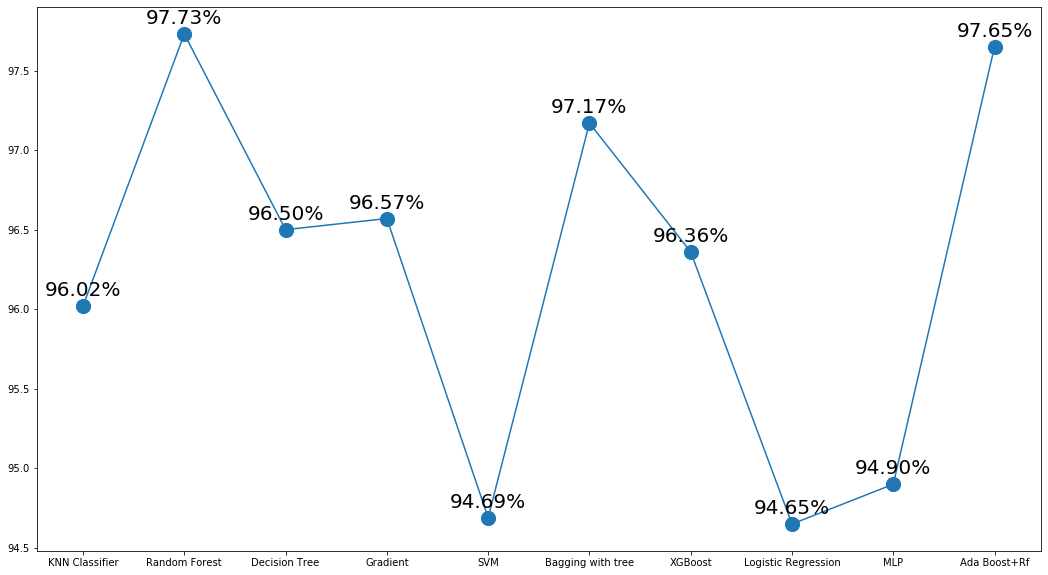

In [240]:
models=['KNN Classifier','Random Forest','Decision Tree','Gradient','SVM', 'Bagging with tree', 'XGBoost','Logistic Regression','MLP', 'Ada Boost+Rf']
accuracies=[96.02, 97.73, 96.50, 96.57, 94.69, 97.17, 96.36, 94.65, 94.90, 97.65]
plt.figure(figsize=(18,10))
plt.scatter(x=models, y=accuracies,s=200)
plt.plot(models,accuracies)
for x,y in zip(models,accuracies):
    label = "{:.2f}%".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center',fontsize=20)

### Conclusion for non processing Random Forest has Highest accuracy

# ------>Technique:  Standard Scalar

In [55]:
from sklearn.preprocessing import StandardScaler
X_scalar = StandardScaler().fit_transform(X_.values)
df_scalar = pd.DataFrame(X_scalar, columns=X_col)
df_scalar.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,1.290338,0.965807,-0.742185,-1.115956,1.063009,-0.011612,-0.011969,0.757846,0.821354,0.603234
1,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,0.321040,1.731617,-0.742185,1.041755,-0.275616,-0.011612,-0.011969,-0.091919,-1.600211,-1.155621
2,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-1.617558,-0.948718,-0.742185,-1.115956,-0.989549,-0.011612,-0.011969,0.757846,0.056649,1.649677
3,-0.198573,4.816341,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,0.321040,1.348712,0.266385,-0.462964,1.866184,-0.011612,-0.011969,0.757846,-0.485017,1.581762
4,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,0.321040,1.348712,0.266385,0.360373,0.527559,-0.011612,-0.011969,0.757846,-0.208874,-0.326783


In [56]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_scalar, y_,
                                                    train_size=0.8,
                                                    random_state=42)
X_train1, X_validation1, y_train1, y_validation1 = train_test_split(X_train1, y_train1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classication on data scaled using StandardScalar

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train1, y_train1)
print_score(rf1, X_train1, X_validation1, y_train1, y_validation1, train=True)
print_score(rf1, X_train1, X_validation1, y_train1, y_validation1, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9781
Accuracy SD: 		 0.0037

Test Result:

accuracy score: 0.9780

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.95      0.62      0.75       152

    accuracy                           0.98      2861
   macro avg       0.96      0.81      0.87      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2704    5]
 [  58   94]]

ROC AUC: 0.8083



# ----->Technique: Min-Max Scalar

In [58]:
from sklearn.preprocessing import MinMaxScaler
X_mimmax = MinMaxScaler().fit_transform(X_.values)
df_minmax = pd.DataFrame(X_mimmax, columns=X_col)
df_minmax.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,0.714286,0.000000,0.000000,0.621622,0.0,0.0,0.955556,0.703704,0.610809
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,1.000000,0.000000,0.580153,0.216216,0.0,0.0,0.677778,0.000000,0.079179
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.955556,0.481481,0.927105
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.857143,0.166667,0.175573,0.864865,0.0,0.0,0.955556,0.324074,0.906577
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.857143,0.166667,0.396947,0.459459,0.0,0.0,0.955556,0.404321,0.329703


In [59]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_minmax, y_)
X_train2, X_validation2, y_train2, y_validation2 = train_test_split(X_train2, y_train2,
                                                    train_size=0.8, random_state=42)

## Random Forest classication on data scaled using MinMaxScalar

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train2, y_train2)
print_score(rf2, X_train2, X_validation2, y_train2, y_validation2, train=True)
print_score(rf2, X_train2, X_validation2, y_train2, y_validation2, train=False)

Train Result:

accuracy score: 0.9995

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10206
           1       0.99      1.00      1.00       522

    accuracy                           1.00     10728
   macro avg       1.00      1.00      1.00     10728
weighted avg       1.00      1.00      1.00     10728


Confusion Matrix: 
 [[10203     3]
 [    2   520]]

ROC AUC: 0.9979

Average Accuracy: 	 0.9757
Accuracy SD: 		 0.0033

Test Result:

accuracy score: 0.9791

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2550
           1       0.96      0.60      0.74       132

    accuracy                           0.98      2682
   macro avg       0.97      0.80      0.86      2682
weighted avg       0.98      0.98      0.98      2682


Confusion Matrix: 
 [[2547    3]
 [  53   79]]

ROC AUC: 0.7987



# ----->Technique: Binarize Data (Make Binary)  value>0 => 1 ,  value<0 => 0    

In [63]:
from sklearn.preprocessing import Binarizer
X_binary = Binarizer(threshold=0.0).fit_transform(X_.values)
df_binary = pd.DataFrame(X_binary, columns=X_col)
df_binary.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [64]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_binary, y_,
                                                    train_size=0.8, random_state=42)
X_train3, X_validation3, y_train3, y_validation3 = train_test_split(X_train3, y_train3,
                                                    train_size=0.8, random_state=42)

## Random Forest classication on data scaled using Binarizer

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(X_train3, y_train3)
print_score(rf3, X_train3, X_validation3, y_train3, y_validation3, train=True)
print_score(rf3, X_train3, X_validation3, y_train3, y_validation3, train=False)

Train Result:

accuracy score: 0.9908

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     10910
           1       0.97      0.83      0.89       533

    accuracy                           0.99     11443
   macro avg       0.98      0.91      0.94     11443
weighted avg       0.99      0.99      0.99     11443


Confusion Matrix: 
 [[10896    14]
 [   91   442]]

ROC AUC: 0.9140

Average Accuracy: 	 0.9687
Accuracy SD: 		 0.0028

Test Result:

accuracy score: 0.9710

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2709
           1       0.82      0.59      0.68       152

    accuracy                           0.97      2861
   macro avg       0.90      0.79      0.83      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2689   20]
 [  63   89]]

ROC AUC: 0.7891



# Balancing Target column [Fraudulent]

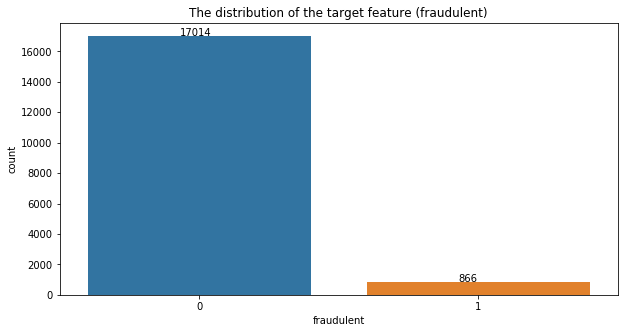

In [71]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

# OverSampling Method Using SMOTE 

In [72]:
#upsampling
smk  = SMOTETomek(random_state=42)
X_res,Y_res= smk.fit_sample(df_minmax, y_)

In [73]:
print(X_res.shape)
print(Y_res.shape)
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, Y_res)
X_train_res, X_validation_res, y_train_res, y_validation_res = train_test_split(X_train_res, y_train_res,
                                                    train_size=0.8, random_state=42)

(34016, 113)
(34016,)


In [74]:
print(X_train_res.shape)
print(X_test_res.shape)
print(X_validation_res.shape)

(20409, 113)
(8504, 113)
(5103, 113)


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_res.fit(X_train_res, y_train_res)
print_score(rf_res, X_train_res, X_validation_res, y_train_res, y_validation_res, train=True)
print_score(rf_res, X_train_res, X_validation_res, y_train_res, y_validation_res, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10197
           1       1.00      1.00      1.00     10212

    accuracy                           1.00     20409
   macro avg       1.00      1.00      1.00     20409
weighted avg       1.00      1.00      1.00     20409


Confusion Matrix: 
 [[10196     1]
 [    2 10210]]

ROC AUC: 0.9999

Average Accuracy: 	 0.9893
Accuracy SD: 		 0.0029

Test Result:

accuracy score: 0.9906

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2521
           1       0.99      0.99      0.99      2582

    accuracy                           0.99      5103
   macro avg       0.99      0.99      0.99      5103
weighted avg       0.99      0.99      0.99      5103


Confusion Matrix: 
 [[2496   25]
 [  23 2559]]

ROC AUC: 0.9906



# Adaptive Synthetic Sampling (ADASYN)

In [77]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_res1,Y_res1= adasyn.fit_sample(df_minmax, y_)
print(X_res1.shape)
print(Y_res1.shape)
from sklearn.model_selection import train_test_split
X_train_res1, X_test_res1, y_train_res1, y_test_res1 = train_test_split(X_res1, Y_res1)
X_train_res1, X_validation_res1, y_train_res1, y_validation_res1 = train_test_split(X_train_res1, y_train_res1,
                                                    train_size=0.8, random_state=42)


(33979, 113)
(33979,)


In [78]:
print(X_train_res1.shape)
print(X_test_res1.shape)
print(X_validation_res1.shape)

(20387, 113)
(8495, 113)
(5097, 113)


In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_res1.fit(X_train_res1, y_train_res1)
print_score(rf_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=True)
print_score(rf_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10162
           1       1.00      1.00      1.00     10225

    accuracy                           1.00     20387
   macro avg       1.00      1.00      1.00     20387
weighted avg       1.00      1.00      1.00     20387


Confusion Matrix: 
 [[10161     1]
 [    1 10224]]

ROC AUC: 0.9999

Average Accuracy: 	 0.9894
Accuracy SD: 		 0.0017

Test Result:

accuracy score: 0.9894

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2550
           1       0.98      0.99      0.99      2547

    accuracy                           0.99      5097
   macro avg       0.99      0.99      0.99      5097
weighted avg       0.99      0.99      0.99      5097


Confusion Matrix: 
 [[2510   40]
 [  14 2533]]

ROC AUC: 0.9894



# ----->Technique drop all NaN values

In [83]:
dropNaN=df.copy()

In [84]:
dropNaN.isna().sum()

abroad            0
account           0
admin             0
administr         0
agent             0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

In [85]:
dropNaN=dropNaN.dropna()
dropNaN.reset_index(inplace = True, drop = True)
dropNaN.shape

(1422, 114)

In [86]:
dropNaN.isna().sum()

abroad        0
account       0
admin         0
administr     0
agent         0
             ..
min_salary    0
max_salary    0
country       0
state         0
city          0
Length: 114, dtype: int64

In [87]:
dropNaN.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Master's Degree,Online Media,Management,0,20000.0,28000.0,DE,BE,Berlin
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,100000.0,120000.0,US,NJ,Jersey City
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Executive,Bachelor's Degree,Facilities Services,Sales,0,120000.0,150000.0,SG,01,Singapore
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Associate,High School or equivalent,Hospital & Health Care,Health Care Provider,0,65000.0,70000.0,US,TX,Fort Worth
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0,75.0,115.0,US,GA,Atlanta


In [88]:
dropNaN.isna().sum().sum()

0

In [89]:
dropNaN.shape

(1422, 114)

In [90]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
dropNaN['employment_type'] = lb_make.fit_transform(dropNaN['employment_type'])
dropNaN['required_experience'] = lb_make.fit_transform(dropNaN['required_experience'])
dropNaN['required_education'] = lb_make.fit_transform(dropNaN['required_education'])
dropNaN['industry'] = lb_make.fit_transform(dropNaN['industry'])
dropNaN['function'] = lb_make.fit_transform(dropNaN['function'])
dropNaN['country'] = lb_make.fit_transform(dropNaN['country'])
dropNaN['state'] = lb_make.fit_transform(dropNaN['state'])
dropNaN['city'] = lb_make.fit_transform(dropNaN['city'])

dropNaN.head() #Results in appending a new column to df

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,5,69,20,0,20000.0,28000.0,5,22,58
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,46,18,0,100000.0,120000.0,39,89,190
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,32,31,0,120000.0,150000.0,34,1,352
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,41,16,0,65000.0,70000.0,39,122,145
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,18,18,0,75.0,115.0,39,45,27


In [91]:
print(dropNaN['min_salary'].value_counts())
print(dropNaN['max_salary'].value_counts())

30000.0      112
0.0           95
40000.0       86
50000.0       84
70000.0       58
            ... 
4001.0         1
1234.0         1
3000000.0      1
12500.0        1
16500.0        1
Name: min_salary, Length: 159, dtype: int64
0.0          81
50000.0      78
40000.0      66
80000.0      57
100000.0     57
             ..
280000.0      1
168000.0      1
2500000.0     1
16074.0       1
117000.0      1
Name: max_salary, Length: 191, dtype: int64


In [92]:
dropNaN['fraudulent']=dropNaN['fraudulent'].astype('category')
dropNaN.dtypes

abroad        float64
account       float64
admin         float64
administr     float64
agent         float64
               ...   
min_salary    float64
max_salary    float64
country         int32
state           int32
city            int32
Length: 114, dtype: object

In [93]:
X_dropnan = dropNaN.drop(['fraudulent'], axis=1)
X_col_dropnan = X_dropnan.columns
y_dropnan = dropNaN['fraudulent']

In [94]:
from sklearn.model_selection import train_test_split
X_train_dropnan, X_test_dropnan, y_train_dropnan, y_test_dropnan = train_test_split(X_dropnan, y_dropnan,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan = train_test_split(X_train_dropnan, y_train_dropnan,
                                                    train_size=0.8,
                                                    random_state=42)

In [95]:
print(X_train_dropnan.shape)
print(X_test_dropnan.shape)
print(X_validation_dropnan.shape)

(909, 113)
(285, 113)
(228, 113)


## Random Forest after removing all NaN values

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan = RandomForestClassifier(n_estimators=100)
rf_dropnan.fit(X_train_dropnan, y_train_dropnan)
print_score(rf_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=True)
print_score(rf_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00        62

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909


Confusion Matrix: 
 [[847   0]
 [  0  62]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9637
Accuracy SD: 		 0.0121

Test Result:

accuracy score: 0.9298

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       201
           1       1.00      0.41      0.58        27

    accuracy                           0.93       228
   macro avg       0.96      0.70      0.77       228
weighted avg       0.93      0.93      0.92       228


Confusion Matrix: 
 [[201   0]
 [ 16  11]]

ROC AUC: 0.7037



# ---->Technique : Standard Scalar on dataset whose all NaN values are dropped

In [97]:
from sklearn.preprocessing import StandardScaler
X_dropnan_scaler = StandardScaler().fit_transform(X_dropnan.values)
df_dropnan_scaler = pd.DataFrame(X_dropnan_scaler, columns=X_col_dropnan)
df_dropnan_scaler.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,-0.229988,-0.08678,-0.196284,-0.094574,-0.180156,-0.074235,-0.101186,0.0,-0.103687,...,-0.058872,0.994842,1.518599,1.028017,0.392002,-0.038356,-0.039271,-1.890951,-1.352102,-1.159304
1,0.0,-0.229988,-0.08678,-0.196284,-0.094574,-0.180156,-0.074235,-0.101186,0.0,-0.103687,...,-0.058872,0.994842,-0.639230,0.022023,0.179244,-0.035156,-0.036864,0.714010,0.521592,-0.035823
2,0.0,-0.229988,-0.08678,-0.196284,-0.094574,-0.180156,-0.074235,-0.101186,0.0,-0.103687,...,-0.058872,0.065364,-0.639230,-0.590321,1.562173,-0.034356,-0.036079,0.330927,-1.939380,1.342996
3,0.0,-0.229988,-0.08678,-0.196284,-0.094574,-0.180156,-0.074235,-0.101186,0.0,-0.103687,...,-0.058872,-1.328853,0.979142,-0.196671,-0.033515,-0.036556,-0.038172,0.714010,1.444456,-0.418828
4,0.0,-0.229988,-0.08678,-0.196284,-0.094574,-0.180156,-0.074235,-0.101186,0.0,-0.103687,...,-0.058872,0.994842,-0.639230,-1.202664,0.179244,-0.039153,-0.040000,0.714010,-0.708894,-1.423152


In [98]:
from sklearn.model_selection import train_test_split
X_train_dropnan1, X_test_dropnan1, y_train_dropnan1, y_test_dropnan1 = train_test_split(df_dropnan_scaler , y_dropnan,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_dropnan1, X_validation_dropnan1, y_train_dropnan1, y_validation_dropnan1 = train_test_split(X_train_dropnan1, y_train_dropnan1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classication on scaled NaN values dropped data using StandardScalar

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan1 = RandomForestClassifier(n_estimators=100)
rf_dropnan1.fit(X_train_dropnan1, y_train_dropnan1)
print_score(rf_dropnan1, X_train_dropnan1, X_validation_dropnan1, y_train_dropnan1, y_validation_dropnan1, train=True)
print_score(rf_dropnan1, X_train_dropnan1, X_validation_dropnan1, y_train_dropnan1, y_validation_dropnan1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00        62

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909


Confusion Matrix: 
 [[847   0]
 [  0  62]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9670
Accuracy SD: 		 0.0139

Test Result:

accuracy score: 0.9254

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       201
           1       0.92      0.41      0.56        27

    accuracy                           0.93       228
   macro avg       0.92      0.70      0.76       228
weighted avg       0.92      0.93      0.91       228


Confusion Matrix: 
 [[200   1]
 [ 16  11]]

ROC AUC: 0.7012



# ----->Technique:  Min max Scalar on dataset whose all NaN values are dropped

In [100]:
from sklearn.preprocessing import MinMaxScaler
X_dropnan_minmax = MinMaxScaler().fit_transform(X_dropnan.values)
df_dropnan_minmax = pd.DataFrame(X_dropnan_minmax, columns=X_col_dropnan)
df_dropnan_minmax.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.454545,0.711340,0.571429,2.500000e-05,2.333333e-05,0.125,0.161765,0.135198
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.474227,0.514286,1.250000e-04,1.000000e-04,0.975,0.654412,0.442890
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.500000,0.090909,0.329897,0.885714,1.500000e-04,1.250000e-04,0.850,0.007353,0.820513
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.000000,0.363636,0.422680,0.457143,8.125000e-05,5.833333e-05,0.975,0.897059,0.337995
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.185567,0.514286,9.375000e-08,9.583333e-08,0.975,0.330882,0.062937


In [101]:
from sklearn.model_selection import train_test_split
X_train_dropnan2, X_test_dropnan2, y_train_dropnan2, y_test_dropnan2 = train_test_split(df_dropnan_minmax, y_dropnan,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_dropnan2, X_validation_dropnan2, y_train_dropnan2, y_validation_dropnan2 = train_test_split(X_train_dropnan2, y_train_dropnan2,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classication on scaled NaN values dropped data using MinMaxScalar

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan2 = RandomForestClassifier(n_estimators=100)
rf_dropnan2.fit(X_train_dropnan2, y_train_dropnan2)
print_score(rf_dropnan2, X_train_dropnan2, X_validation_dropnan2, y_train_dropnan2, y_validation_dropnan2, train=True)
print_score(rf_dropnan2, X_train_dropnan2, X_validation_dropnan2, y_train_dropnan2, y_validation_dropnan2, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00        62

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909


Confusion Matrix: 
 [[847   0]
 [  0  62]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9648
Accuracy SD: 		 0.0138

Test Result:

accuracy score: 0.9298

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       201
           1       1.00      0.41      0.58        27

    accuracy                           0.93       228
   macro avg       0.96      0.70      0.77       228
weighted avg       0.93      0.93      0.92       228


Confusion Matrix: 
 [[201   0]
 [ 16  11]]

ROC AUC: 0.7037



# ------>Technique: Binarize Data (Make Binary)  value>0 => 1 ,  value<0 => 0    

In [103]:
from sklearn.preprocessing import Binarizer
X_dropnan_binary = Binarizer(threshold=0.0).fit_transform(X_dropnan.values)
df_dropnan_binary = pd.DataFrame(X_dropnan_binary, columns=X_col_dropnan)
df_dropnan_binary.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [104]:
from sklearn.model_selection import train_test_split
X_train_dropnan3, X_test_dropnan3, y_train_dropnan3, y_test_dropnan3 = train_test_split(df_dropnan_binary, y_dropnan,
                                                    train_size=0.8, random_state=42)
X_train_dropnan3, X_validation_dropnan3, y_train_dropnan3, y_validation_dropnan3 = train_test_split(X_train_dropnan3, y_train_dropnan3,
                                                    train_size=0.8, random_state=42)

## Random Forest classication on scaled NaN values dropped data using Binarizer

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan3 = RandomForestClassifier(n_estimators=100)
rf_dropnan3.fit(X_train_dropnan3, y_train_dropnan3)
print_score(rf_dropnan3, X_train_dropnan3, X_validation_dropnan3, y_train_dropnan3, y_validation_dropnan3, train=True)
print_score(rf_dropnan3, X_train_dropnan3, X_validation_dropnan3, y_train_dropnan3, y_validation_dropnan3, train=False)

Train Result:

accuracy score: 0.9868

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       847
           1       0.95      0.85      0.90        62

    accuracy                           0.99       909
   macro avg       0.97      0.93      0.95       909
weighted avg       0.99      0.99      0.99       909


Confusion Matrix: 
 [[844   3]
 [  9  53]]

ROC AUC: 0.9256

Average Accuracy: 	 0.9417
Accuracy SD: 		 0.0225

Test Result:

accuracy score: 0.9079

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       201
           1       0.80      0.30      0.43        27

    accuracy                           0.91       228
   macro avg       0.86      0.64      0.69       228
weighted avg       0.90      0.91      0.89       228


Confusion Matrix: 
 [[199   2]
 [ 19   8]]

ROC AUC: 0.6432



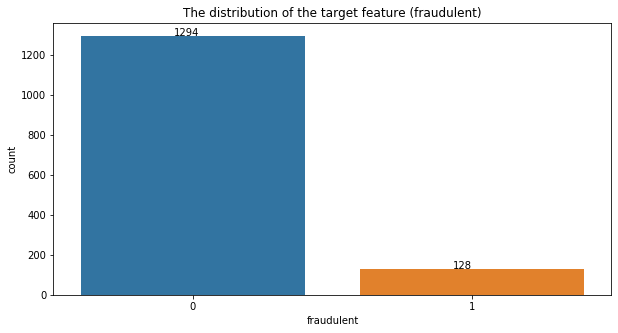

In [106]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(dropNaN.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

# OverSampling Method Using SMOTE

In [108]:
#upsampling
smk  = SMOTETomek(random_state=42)
X_dropnan_res,Y_dropnan_res= smk.fit_sample(df_dropnan_minmax, y_dropnan)
print(X_dropnan_res.shape)
print(Y_dropnan_res.shape)

from sklearn.model_selection import train_test_split
X_train_dropnan_res, X_test_dropnan_res, y_train_dropnan_res, y_test_dropnan_res = train_test_split(X_dropnan_res, Y_dropnan_res)
X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res = train_test_split(X_train_dropnan_res, y_train_dropnan_res, train_size=0.8, random_state=42)

(2586, 113)
(2586,)


In [110]:
print(X_train_dropnan_res.shape)
print(X_test_dropnan_res.shape)
print(X_validation_dropnan_res.shape)

(1551, 113)
(647, 113)
(388, 113)


# Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_dropnan_res.fit(X_train_dropnan_res, y_train_dropnan_res)
print_score(rf_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=True)
print_score(rf_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       761
           1       1.00      1.00      1.00       790

    accuracy                           1.00      1551
   macro avg       1.00      1.00      1.00      1551
weighted avg       1.00      1.00      1.00      1551


Confusion Matrix: 
 [[761   0]
 [  0 790]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9729
Accuracy SD: 		 0.0103

Test Result:

accuracy score: 0.9871

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       189
           1       0.98      0.99      0.99       199

    accuracy                           0.99       388
   macro avg       0.99      0.99      0.99       388
weighted avg       0.99      0.99      0.99       388


Confusion Matrix: 
 [[185   4]
 [  1 198]]

ROC AUC: 0.9869



# Adaptive Synthetic Sampling (ADASYN)

In [112]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_dropnan_res1,Y_dropnan_res1= adasyn.fit_sample(df_dropnan_minmax, y_dropnan)
print(X_dropnan_res1.shape)
print(Y_dropnan_res1.shape)
from sklearn.model_selection import train_test_split
X_train_dropnan_res1, X_test_dropnan_res1, y_train_dropnan_res1, y_test_dropnan_res1 = train_test_split(X_dropnan_res1, Y_dropnan_res1)
X_train_dropnan_res1, X_validation_dropnan_res1, y_train_dropnan_res1, y_validation_dropnan_res1 = train_test_split(X_train_dropnan_res1, y_train_dropnan_res1,  train_size=0.8, random_state=42)

(2610, 113)
(2610,)


In [113]:
print(X_train_dropnan_res1.shape)
print(X_test_dropnan_res1.shape)
print(X_validation_dropnan_res1.shape)

(1565, 113)
(653, 113)
(392, 113)


In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_dropnan_res1.fit(X_train_dropnan_res1, y_train_dropnan_res1)
print_score(rf_dropnan_res1, X_train_dropnan_res1, X_validation_dropnan_res1, y_train_dropnan_res1, y_validation_dropnan_res1, train=True)
print_score(rf_dropnan_res1, X_train_dropnan_res1, X_validation_dropnan_res1, y_train_dropnan_res1, y_validation_dropnan_res1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       769
           1       1.00      1.00      1.00       796

    accuracy                           1.00      1565
   macro avg       1.00      1.00      1.00      1565
weighted avg       1.00      1.00      1.00      1565


Confusion Matrix: 
 [[769   0]
 [  0 796]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9795
Accuracy SD: 		 0.0124

Test Result:

accuracy score: 0.9898

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       211
           1       0.99      0.99      0.99       181

    accuracy                           0.99       392
   macro avg       0.99      0.99      0.99       392
weighted avg       0.99      0.99      0.99       392


Confusion Matrix: 
 [[209   2]
 [  2 179]]

ROC AUC: 0.9897



# ------>Technique : Replacing all NaN values with mode 

In [115]:
df_NaN_Mode=df.copy()

In [116]:
df_NaN_Mode.isna().sum()

abroad            0
account           0
admin             0
administr         0
agent             0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

In [117]:
df_NaN_Mode.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,NaN,NaN,Marketing,0,NaN,NaN,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NZ,NaN,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,US,FL,Fort Worth


In [118]:
df_NaN_Mode.shape

(17880, 114)

In [119]:
df_NaN_Mode['employment_type'].fillna(df_NaN_Mode['employment_type'].mode()[0], inplace=True)
df_NaN_Mode['required_experience'].fillna(df_NaN_Mode['required_experience'].mode()[0], inplace=True)
df_NaN_Mode['required_education'].fillna(df_NaN_Mode['required_education'].mode()[0], inplace=True)
df_NaN_Mode['industry'].fillna(df_NaN_Mode['industry'].mode()[0], inplace=True)
df_NaN_Mode['function'].fillna(df_NaN_Mode['function'].mode()[0], inplace=True)
df_NaN_Mode['min_salary'].fillna(df_NaN_Mode['min_salary'].mode()[0], inplace=True)
df_NaN_Mode['max_salary'].fillna(df_NaN_Mode['max_salary'].mode()[0], inplace=True)
df_NaN_Mode['country'].fillna(df_NaN_Mode['country'].mode()[0], inplace=True)
df_NaN_Mode['state'].fillna(df_NaN_Mode['state'].mode()[0], inplace=True)
df_NaN_Mode['city'].fillna(df_NaN_Mode['city'].mode()[0], inplace=True)

In [120]:
df_NaN_Mode.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0,0.0,0.0,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0,0.0,0.0,NZ,CA,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,0.0,0.0,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0.0,0.0,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0.0,0.0,US,FL,Fort Worth


In [121]:
df_NaN_Mode['fraudulent']=df_NaN_Mode['fraudulent'].astype('category')
df_NaN_Mode.dtypes

abroad        float64
account       float64
admin         float64
administr     float64
agent         float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object

In [122]:
df_NaN_Mode.isna().sum()

abroad        0
account       0
admin         0
administr     0
agent         0
             ..
min_salary    0
max_salary    0
country       0
state         0
city          0
Length: 114, dtype: int64

In [124]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_Mode['employment_type'] = lb_make.fit_transform(df_NaN_Mode['employment_type'])
df_NaN_Mode['required_experience'] = lb_make.fit_transform(df_NaN_Mode['required_experience'])
df_NaN_Mode['required_education'] = lb_make.fit_transform(df_NaN_Mode['required_education'])
df_NaN_Mode['industry'] = lb_make.fit_transform(df_NaN_Mode['industry'])
df_NaN_Mode['function'] = lb_make.fit_transform(df_NaN_Mode['function'])
df_NaN_Mode['country'] = lb_make.fit_transform(df_NaN_Mode['country'])
df_NaN_Mode['state'] = lb_make.fit_transform(df_NaN_Mode['state'])
df_NaN_Mode['city'] = lb_make.fit_transform(df_NaN_Mode['city'])
df_NaN_Mode.head() #Results in appending a new column to df

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,1,58,22,0,0.0,0.0,85,227,1457
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1,75,7,0,0.0,0.0,60,83,188
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,58,18,0,0.0,0.0,85,155,2212
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,22,31,0,0.0,0.0,85,104,2163
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,51,16,0,0.0,0.0,85,130,786


In [125]:
df_NaN_Mode.shape

(17880, 114)

In [126]:
X_NaN_Mode = df_NaN_Mode.drop(['fraudulent'], axis=1)
X_col_NaN_Mode = X_NaN_Mode.columns
y_NaN_Mode = df_NaN_Mode['fraudulent']

In [127]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode, X_test_NaN_Mode, y_train_NaN_Mode, y_test_NaN_Mode = train_test_split(X_NaN_Mode, y_NaN_Mode,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode = train_test_split(X_train_NaN_Mode, y_train_NaN_Mode,
                                                    train_size=0.8,
                                                    random_state=42)

In [128]:
print(X_train_NaN_Mode.shape)
print(X_test_NaN_Mode.shape)
print(X_validation_NaN_Mode.shape)

(11443, 113)
(3576, 113)
(2861, 113)


## Random Forest after replacing NaN values with Mode

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode.fit(X_train_NaN_Mode, y_train_NaN_Mode)
print_score(rf_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=True)
print_score(rf_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    4   529]]

ROC AUC: 0.9962

Average Accuracy: 	 0.9773
Accuracy SD: 		 0.0041

Test Result:

accuracy score: 0.9801

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.95      0.66      0.78       152

    accuracy                           0.98      2861
   macro avg       0.97      0.83      0.88      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2704    5]
 [  52  100]]

ROC AUC: 0.8280



# ---->Technique : Standard Scalar on dataset whose all NaN values are replaced with mode

In [130]:
from sklearn.preprocessing import StandardScaler
X_NaN_Mode_scaler = StandardScaler().fit_transform(X_NaN_Mode.values)
df_NaN_Mode_scaler = pd.DataFrame(X_NaN_Mode_scaler, columns=X_col_NaN_Mode)
df_NaN_Mode_scaler.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,1.501706,0.081438,-0.398503,0.136639,0.670822,-0.011612,-0.011969,0.732256,0.836076,0.480200
1,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,1.121890,-0.398503,0.797588,-1.320836,-0.011612,-0.011969,-0.155046,-1.010106,-1.567810
2,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,0.136639,0.139713,-0.011612,-0.011969,0.732256,-0.087015,1.698677
3,-0.198573,4.816341,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,-1.263019,1.865816,-0.011612,-0.011969,0.732256,-0.740871,1.619597
4,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,-0.135517,-0.125841,-0.011612,-0.011969,0.732256,-0.407533,-0.602712


In [131]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode1, X_test_NaN_Mode1, y_train_NaN_Mode1, y_test_NaN_Mode1 = train_test_split(df_NaN_Mode_scaler, y_NaN_Mode,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode1, X_validation_NaN_Mode1, y_train_NaN_Mode1, y_validation_NaN_Mode1 = train_test_split(X_train_NaN_Mode1, y_train_NaN_Mode1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with Mode, scaled using StandardScalar.

In [132]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode1 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode1.fit(X_train_NaN_Mode1, y_train_NaN_Mode1)
print_score(rf_NaN_Mode1, X_train_NaN_Mode1, X_validation_NaN_Mode1, y_train_NaN_Mode1, y_validation_NaN_Mode1, train=True)
print_score(rf_NaN_Mode1, X_train_NaN_Mode1, X_validation_NaN_Mode1, y_train_NaN_Mode1, y_validation_NaN_Mode1, train=False)

Train Result:

accuracy score: 0.9996

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10909     1]
 [    4   529]]

ROC AUC: 0.9962

Average Accuracy: 	 0.9775
Accuracy SD: 		 0.0039

Test Result:

accuracy score: 0.9808

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.95      0.67      0.79       152

    accuracy                           0.98      2861
   macro avg       0.97      0.83      0.89      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2704    5]
 [  50  102]]

ROC AUC: 0.8346



# ----->Technique: Min max Scalar on dataset whose all NaN values are replaced with mode

In [133]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_Mode_minmax = MinMaxScaler().fit_transform(df_NaN_Mode_scaler.values)
df_NaN_Mode_minmax = pd.DataFrame(X_NaN_Mode_minmax, columns=X_col_NaN_Mode)
df_NaN_Mode_minmax.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.666667,0.090909,0.446154,0.611111,0.0,0.0,0.955056,0.702786,0.610645
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.000000,0.090909,0.576923,0.194444,0.0,0.0,0.674157,0.256966,0.078793
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.446154,0.500000,0.0,0.0,0.955056,0.479876,0.927075
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.169231,0.861111,0.0,0.0,0.955056,0.321981,0.906538
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.392308,0.444444,0.0,0.0,0.955056,0.402477,0.329422


In [134]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode2, X_test_NaN_Mode2, y_train_NaN_Mode2, y_test_NaN_Mode2 = train_test_split(df_NaN_Mode_minmax, y_NaN_Mode,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode2, X_validation_NaN_Mode2, y_train_NaN_Mode2, y_validation_NaN_Mode2 = train_test_split(X_train_NaN_Mode2, y_train_NaN_Mode2,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with Mode, scaled using MinMaxScalar.

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode2 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode2.fit(X_train_NaN_Mode2, y_train_NaN_Mode2)
print_score(rf_NaN_Mode2, X_train_NaN_Mode2, X_validation_NaN_Mode2, y_train_NaN_Mode2, y_validation_NaN_Mode2, train=True)
print_score(rf_NaN_Mode2, X_train_NaN_Mode2, X_validation_NaN_Mode2, y_train_NaN_Mode2, y_validation_NaN_Mode2, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    4   529]]

ROC AUC: 0.9962

Average Accuracy: 	 0.9775
Accuracy SD: 		 0.0048

Test Result:

accuracy score: 0.9804

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.95      0.66      0.78       152

    accuracy                           0.98      2861
   macro avg       0.97      0.83      0.89      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2704    5]
 [  51  101]]

ROC AUC: 0.8313



# ----->Technique: Binarize Data (Make Binary)  value>0 => 1 ,  value<0 => 0    

In [136]:
from sklearn.preprocessing import Binarizer
X_NaN_Mode_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_Mode.values)
df_NaN_Mode_binary = pd.DataFrame(X_NaN_Mode_binary, columns=X_col_NaN_Mode)
df_NaN_Mode_binary.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [137]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode3, X_test_NaN_Mode3, y_train_NaN_Mode3, y_test_NaN_Mode3 = train_test_split(df_NaN_Mode_binary, y_NaN_Mode,
                                                    train_size=0.8, random_state=42)
X_train_NaN_Mode3, X_validation_NaN_Mode3, y_train_NaN_Mode3, y_validation_NaN_Mode3 = train_test_split(X_train_NaN_Mode3, y_train_NaN_Mode3,
                                                    train_size=0.8, random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with Mode, scaled using Binarizer.

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode3 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode3.fit(X_train_NaN_Mode3, y_train_NaN_Mode3)
print_score(rf_NaN_Mode3, X_train_NaN_Mode3, X_validation_NaN_Mode3, y_train_NaN_Mode3, y_validation_NaN_Mode3, train=True)
print_score(rf_NaN_Mode3, X_train_NaN_Mode3, X_validation_NaN_Mode3, y_train_NaN_Mode3, y_validation_NaN_Mode3, train=False)

Train Result:

accuracy score: 0.9827

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10910
           1       0.94      0.67      0.78       533

    accuracy                           0.98     11443
   macro avg       0.96      0.83      0.89     11443
weighted avg       0.98      0.98      0.98     11443


Confusion Matrix: 
 [[10888    22]
 [  176   357]]

ROC AUC: 0.8339

Average Accuracy: 	 0.9647
Accuracy SD: 		 0.0037

Test Result:

accuracy score: 0.9643

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.74      0.51      0.60       152

    accuracy                           0.96      2861
   macro avg       0.86      0.75      0.79      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2682   27]
 [  75   77]]

ROC AUC: 0.7483



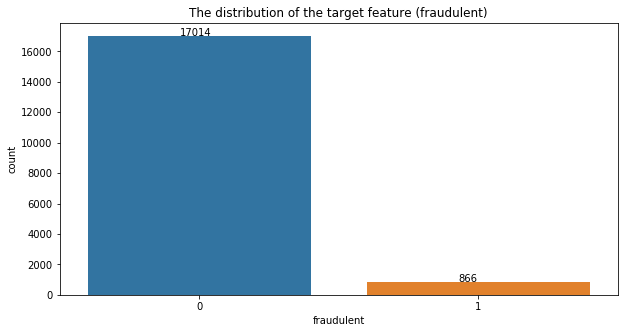

In [140]:
#standard scalar
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_NaN_Mode.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

# OverSampling Method Using SMOTE 

In [142]:
#upsampling
smk  = SMOTETomek(random_state=42)
X_NaN_Mode_res,Y_NaN_Mode_res= smk.fit_sample(df_NaN_Mode_scaler, y_NaN_Mode,)

In [143]:
print(X_NaN_Mode_res.shape)
print(Y_NaN_Mode_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_res, X_test_NaN_Mode_res, y_train_NaN_Mode_res, y_test_NaN_Mode_res = train_test_split(X_NaN_Mode_res, Y_NaN_Mode_res)
X_train_NaN_Mode_res, X_validation_NaN_Mode_res, y_train_NaN_Mode_res, y_validation_NaN_Mode_res = train_test_split(X_train_NaN_Mode_res, y_train_NaN_Mode_res, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_res.shape)
print(X_test_NaN_Mode_res.shape)
print(X_validation_NaN_Mode_res.shape)

(34010, 113)
(34010,)
(20405, 113)
(8503, 113)
(5102, 113)


In [144]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_res.fit(X_train_NaN_Mode_res, y_train_NaN_Mode_res)
print_score(rf_NaN_Mode_res, X_train_NaN_Mode_res, X_validation_NaN_Mode_res, y_train_NaN_Mode_res, y_validation_NaN_Mode_res, train=True)
print_score(rf_NaN_Mode_res, X_train_NaN_Mode_res, X_validation_NaN_Mode_res, y_train_NaN_Mode_res, y_validation_NaN_Mode_res, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10284
           1       1.00      1.00      1.00     10121

    accuracy                           1.00     20405
   macro avg       1.00      1.00      1.00     20405
weighted avg       1.00      1.00      1.00     20405


Confusion Matrix: 
 [[10281     3]
 [    0 10121]]

ROC AUC: 0.9999

Average Accuracy: 	 0.9894
Accuracy SD: 		 0.0022

Test Result:

accuracy score: 0.9867

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2497
           1       0.99      0.99      0.99      2605

    accuracy                           0.99      5102
   macro avg       0.99      0.99      0.99      5102
weighted avg       0.99      0.99      0.99      5102


Confusion Matrix: 
 [[2466   31]
 [  37 2568]]

ROC AUC: 0.9867



# Adaptive Synthetic Sampling (ADASYN)


In [145]:
from imblearn.over_sampling import ADASYN
#upsampling
smk  = ADASYN()
X_NaN_Mode_res1,Y_NaN_Mode_res1= smk.fit_sample(df_NaN_Mode_scaler, y_NaN_Mode)
print(X_NaN_Mode_res1.shape)
print(Y_NaN_Mode_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_res1, X_test_NaN_Mode_res1, y_train_NaN_Mode_res1, y_test_NaN_Mode_res1 = train_test_split(X_NaN_Mode_res1, Y_NaN_Mode_res1)
X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1 = train_test_split(X_train_NaN_Mode_res1, y_train_NaN_Mode_res1, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_res1.shape)
print(X_test_NaN_Mode_res1.shape)
print(X_validation_NaN_Mode_res1.shape)

(33847, 113)
(33847,)
(20308, 113)
(8462, 113)
(5077, 113)


In [146]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_res1.fit(X_train_NaN_Mode_res1, y_train_NaN_Mode_res1)
print_score(rf_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=True)
print_score(rf_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10226
           1       1.00      1.00      1.00     10082

    accuracy                           1.00     20308
   macro avg       1.00      1.00      1.00     20308
weighted avg       1.00      1.00      1.00     20308


Confusion Matrix: 
 [[10221     5]
 [    1 10081]]

ROC AUC: 0.9997

Average Accuracy: 	 0.9887
Accuracy SD: 		 0.0031

Test Result:

accuracy score: 0.9902

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2514
           1       0.99      0.99      0.99      2563

    accuracy                           0.99      5077
   macro avg       0.99      0.99      0.99      5077
weighted avg       0.99      0.99      0.99      5077


Confusion Matrix: 
 [[2480   34]
 [  16 2547]]

ROC AUC: 0.9901



#  ------>Technique: Replacing categorical NaN values with mode and numerical with mean

In [151]:
df_NaN_Mode_Mean=df.copy()

In [152]:
df_NaN_Mode_Mean.isna().sum()

abroad            0
account           0
admin             0
administr         0
agent             0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

In [153]:
df_NaN_Mode_Mean.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,NaN,NaN,Marketing,0,NaN,NaN,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NZ,NaN,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,US,FL,Fort Worth


In [154]:
df_NaN_Mode_Mean.shape

(17880, 114)

In [155]:
#categorical
df_NaN_Mode_Mean['employment_type'].fillna(df_NaN_Mode_Mean['employment_type'].mode()[0], inplace=True)
df_NaN_Mode_Mean['required_experience'].fillna(df_NaN_Mode_Mean['required_experience'].mode()[0], inplace=True)
df_NaN_Mode_Mean['required_education'].fillna(df_NaN_Mode_Mean['required_education'].mode()[0], inplace=True)
df_NaN_Mode_Mean['industry'].fillna(df_NaN_Mode_Mean['industry'].mode()[0], inplace=True)
df_NaN_Mode_Mean['function'].fillna(df_NaN_Mode_Mean['function'].mode()[0], inplace=True)
df_NaN_Mode_Mean['country'].fillna(df_NaN_Mode_Mean['country'].mode()[0], inplace=True)
df_NaN_Mode_Mean['state'].fillna(df_NaN_Mode_Mean['state'].mode()[0], inplace=True)
df_NaN_Mode_Mean['city'].fillna(df_NaN_Mode_Mean['city'].mode()[0], inplace=True)

#numerical
df_NaN_Mode_Mean['min_salary'].fillna((df_NaN_Mode_Mean['min_salary'].mean()), inplace=True)
df_NaN_Mode_Mean['max_salary'].fillna((df_NaN_Mode_Mean['max_salary'].mean()), inplace=True)

In [156]:
df_NaN_Mode_Mean.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0,510737.528591,804935.732218,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0,510737.528591,804935.732218,NZ,CA,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,510737.528591,804935.732218,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,510737.528591,804935.732218,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,510737.528591,804935.732218,US,FL,Fort Worth


In [157]:
df_NaN_Mode_Mean.isna().sum().sum()

0

In [158]:
df_NaN_Mode_Mean['fraudulent']=df_NaN_Mode_Mean['fraudulent'].astype('category')
df_NaN_Mode_Mean.dtypes

abroad        float64
account       float64
admin         float64
administr     float64
agent         float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object

In [159]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_Mode_Mean['employment_type'] = lb_make.fit_transform(df_NaN_Mode_Mean['employment_type'])
df_NaN_Mode_Mean['required_experience'] = lb_make.fit_transform(df_NaN_Mode_Mean['required_experience'])
df_NaN_Mode_Mean['required_education'] = lb_make.fit_transform(df_NaN_Mode_Mean['required_education'])
df_NaN_Mode_Mean['industry'] = lb_make.fit_transform(df_NaN_Mode_Mean['industry'])
df_NaN_Mode_Mean['function'] = lb_make.fit_transform(df_NaN_Mode_Mean['function'])
df_NaN_Mode_Mean['country'] = lb_make.fit_transform(df_NaN_Mode_Mean['country'])
df_NaN_Mode_Mean['state'] = lb_make.fit_transform(df_NaN_Mode_Mean['state'])
df_NaN_Mode_Mean['city'] = lb_make.fit_transform(df_NaN_Mode_Mean['city'])
df_NaN_Mode_Mean.head() #Results in appending a new column to df

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,1,58,22,0,510737.528591,804935.732218,85,227,1457
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1,75,7,0,510737.528591,804935.732218,60,83,188
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,58,18,0,510737.528591,804935.732218,85,155,2212
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,22,31,0,510737.528591,804935.732218,85,104,2163
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,51,16,0,510737.528591,804935.732218,85,130,786


In [160]:
df_NaN_Mode_Mean.shape

(17880, 114)

In [161]:
X_NaN_Mode_Mean = df_NaN_Mode_Mean.drop(['fraudulent'], axis=1)
X_col_NaN_Mode_Mean = X_NaN_Mode_Mean.columns
y_NaN_Mode_Mean = df_NaN_Mode_Mean['fraudulent']

In [162]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean, X_test_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_test_NaN_Mode_Mean = train_test_split(X_NaN_Mode_Mean, y_NaN_Mode_Mean,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean = train_test_split(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean,
                                                    train_size=0.8,
                                                    random_state=42)

In [163]:
print(X_train_NaN_Mode_Mean.shape)
print(X_test_NaN_Mode_Mean.shape)
print(X_validation_NaN_Mode_Mean.shape)

(11443, 113)
(3576, 113)
(2861, 113)


## Random Forest after replacing categorical NaN values with Mode, numerical with mean

In [164]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Mean.fit(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean)
print_score(rf_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=True)
print_score(rf_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10909     1]
 [    3   530]]

ROC AUC: 0.9971

Average Accuracy: 	 0.9770
Accuracy SD: 		 0.0042

Test Result:

accuracy score: 0.9804

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.95      0.66      0.78       152

    accuracy                           0.98      2861
   macro avg       0.97      0.83      0.89      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2704    5]
 [  51  101]]

ROC AUC: 0.8313



# ---->Technique : Standard Scalar on dataset whose categorical NaN values are replaced with mode and numerical with mean

In [165]:
from sklearn.preprocessing import StandardScaler
X_NaN_Mode_Mean_scaler = StandardScaler().fit_transform(X_NaN_Mode_Mean.values)
df_NaN_Mode_Mean_scaler = pd.DataFrame(X_NaN_Mode_Mean_scaler, columns=X_col_NaN_Mode_Mean)
df_NaN_Mode_Mean_scaler.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,1.501706,0.081438,-0.398503,0.136639,0.670822,8.253194e-18,0.0,0.732256,0.836076,0.480200
1,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,1.121890,-0.398503,0.797588,-1.320836,8.253194e-18,0.0,-0.155046,-1.010106,-1.567810
2,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,0.136639,0.139713,8.253194e-18,0.0,0.732256,-0.087015,1.698677
3,-0.198573,4.816341,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,-1.263019,1.865816,8.253194e-18,0.0,0.732256,-0.740871,1.619597
4,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,-0.135517,-0.125841,8.253194e-18,0.0,0.732256,-0.407533,-0.602712


In [166]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean1, X_test_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1, y_test_NaN_Mode_Mean_Mean1 = train_test_split(df_NaN_Mode_Mean_scaler, y_NaN_Mode_Mean,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Mean1, X_validation_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1, y_validation_NaN_Mode_Mean1 = train_test_split(X_train_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which categorical NaN values replaced with Mode and numerical NaN values with mean, scaled using StandardScalar.

In [167]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean1 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Mean1.fit(X_train_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1)
print_score(rf_NaN_Mode_Mean1, X_train_NaN_Mode_Mean1, X_validation_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1, y_validation_NaN_Mode_Mean1, train=True)
print_score(rf_NaN_Mode_Mean1, X_train_NaN_Mode_Mean1, X_validation_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1, y_validation_NaN_Mode_Mean1, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    4   529]]

ROC AUC: 0.9962

Average Accuracy: 	 0.9772
Accuracy SD: 		 0.0044

Test Result:

accuracy score: 0.9797

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.94      0.66      0.78       152

    accuracy                           0.98      2861
   macro avg       0.96      0.83      0.88      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2703    6]
 [  52  100]]

ROC AUC: 0.8278



# ----->Technique: Min max Scalar on dataset whose categorical NaN values are replaced with mode, numerical with mean

In [168]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_Mode_Mean_minmax = MinMaxScaler().fit_transform(df_NaN_Mode_Mean_scaler.values)
df_NaN_Mode_Mean_minmax = pd.DataFrame(X_NaN_Mode_Mean_minmax, columns=X_col_NaN_Mode_Mean)
df_NaN_Mode_Mean_minmax.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.666667,0.090909,0.446154,0.611111,0.000638,0.000671,0.955056,0.702786,0.610645
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.000000,0.090909,0.576923,0.194444,0.000638,0.000671,0.674157,0.256966,0.078793
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.446154,0.500000,0.000638,0.000671,0.955056,0.479876,0.927075
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.169231,0.861111,0.000638,0.000671,0.955056,0.321981,0.906538
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.392308,0.444444,0.000638,0.000671,0.955056,0.402477,0.329422


In [169]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean2, X_test_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2, y_test_NaN_Mode_Mean2 = train_test_split(df_NaN_Mode_Mean_minmax, y_NaN_Mode_Mean,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Mean2, X_validation_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2, y_validation_NaN_Mode_Mean2 = train_test_split(X_train_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which categorical NaN values replaced with Mode and numerical NaN values with mean, scaled using MinMaxScalar.

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean2 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Mean2.fit(X_train_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2)
print_score(rf_NaN_Mode_Mean2, X_train_NaN_Mode_Mean2, X_validation_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2, y_validation_NaN_Mode_Mean2, train=True)
print_score(rf_NaN_Mode_Mean2, X_train_NaN_Mode_Mean2, X_validation_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2, y_validation_NaN_Mode_Mean2, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    4   529]]

ROC AUC: 0.9962

Average Accuracy: 	 0.9778
Accuracy SD: 		 0.0037

Test Result:

accuracy score: 0.9801

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.96      0.65      0.78       152

    accuracy                           0.98      2861
   macro avg       0.97      0.82      0.88      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2705    4]
 [  53   99]]

ROC AUC: 0.8249



# ----->Technique: Binarize Data (Make Binary)  value>0 => 1 ,  value<0 => 0    

In [171]:
from sklearn.preprocessing import Binarizer
X_NaN_Mode_Mean_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_Mode_Mean.values)
df_NaN_Mode_Mean_binary = pd.DataFrame(X_NaN_Mode_Mean_binary, columns=X_col_NaN_Mode_Mean)
df_NaN_Mode_Mean_binary.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [172]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean3, X_test_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3, y_test_NaN_Mode_Mean3 = train_test_split(df_NaN_Mode_Mean_binary, y_NaN_Mode_Mean,
                                                    train_size=0.8, random_state=42)
X_train_NaN_Mode_Mean3, X_validation_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3, y_validation_NaN_Mode_Mean3 = train_test_split(X_train_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3,
                                                    train_size=0.8, random_state=42)

## Random Forest classification on scaled data of which categorical NaN values replaced with Mode and numerical NaN values with mean, scaled using Binarizer.

In [173]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean3 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Mean3.fit(X_train_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3)
print_score(rf_NaN_Mode_Mean3, X_train_NaN_Mode_Mean3, X_validation_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3, y_validation_NaN_Mode_Mean3, train=True)
print_score(rf_NaN_Mode_Mean3, X_train_NaN_Mode_Mean3, X_validation_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3, y_validation_NaN_Mode_Mean3, train=False)

Train Result:

accuracy score: 0.9797

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10910
           1       0.91      0.63      0.74       533

    accuracy                           0.98     11443
   macro avg       0.94      0.81      0.87     11443
weighted avg       0.98      0.98      0.98     11443


Confusion Matrix: 
 [[10875    35]
 [  197   336]]

ROC AUC: 0.8136

Average Accuracy: 	 0.9637
Accuracy SD: 		 0.0029

Test Result:

accuracy score: 0.9630

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.73      0.48      0.58       152

    accuracy                           0.96      2861
   macro avg       0.85      0.74      0.78      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2682   27]
 [  79   73]]

ROC AUC: 0.7351



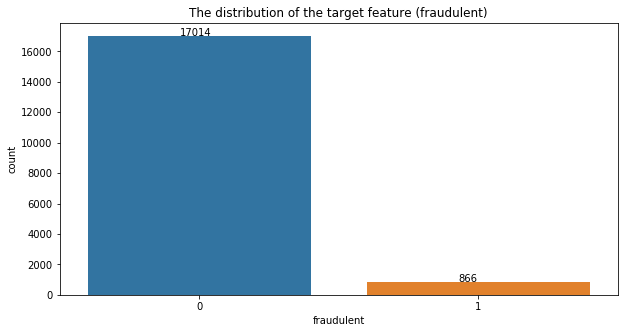

In [174]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_NaN_Mode_Mean.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

# OverSampling Method Using SMOTE 

In [175]:
smk  = SMOTETomek(random_state=42)
X_NaN_Mode_Mean_res,Y_NaN_Mode_Mean_res= smk.fit_sample(df_NaN_Mode_Mean_minmax, y_NaN_Mode_Mean)

In [176]:
print(X_NaN_Mode_Mean_res.shape)
print(Y_NaN_Mode_Mean_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean_res, X_test_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, y_test_NaN_Mode_Mean_res = train_test_split(X_NaN_Mode_Mean_res, Y_NaN_Mode_Mean_res)
X_train_NaN_Mode_Mean_res, X_validation_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, y_validation_NaN_Mode_Mean_res = train_test_split(X_train_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_Mean_res.shape)
print(X_test_NaN_Mode_Mean_res.shape)
print(X_validation_NaN_Mode_Mean_res.shape)

(34010, 113)
(34010,)
(20405, 113)
(8503, 113)
(5102, 113)


In [177]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_Mean_res.fit(X_train_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res)
print_score(rf_NaN_Mode_Mean_res, X_train_NaN_Mode_Mean_res, X_validation_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, y_validation_NaN_Mode_Mean_res, train=True)
print_score(rf_NaN_Mode_Mean_res, X_train_NaN_Mode_Mean_res, X_validation_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, y_validation_NaN_Mode_Mean_res, train=False)


Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10145
           1       1.00      1.00      1.00     10260

    accuracy                           1.00     20405
   macro avg       1.00      1.00      1.00     20405
weighted avg       1.00      1.00      1.00     20405


Confusion Matrix: 
 [[10141     4]
 [    2 10258]]

ROC AUC: 0.9997

Average Accuracy: 	 0.9881
Accuracy SD: 		 0.0016

Test Result:

accuracy score: 0.9873

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2545
           1       0.99      0.99      0.99      2557

    accuracy                           0.99      5102
   macro avg       0.99      0.99      0.99      5102
weighted avg       0.99      0.99      0.99      5102


Confusion Matrix: 
 [[2509   36]
 [  29 2528]]

ROC AUC: 0.9873



# Adaptive Synthetic Sampling (ADASYN)

In [179]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_NaN_Mode_Mean_res1,Y_NaN_Mode_Mean_res1= adasyn.fit_sample(df_NaN_Mode_Mean_minmax, y_NaN_Mode_Mean)

In [180]:
print(X_NaN_Mode_Mean_res1.shape)
print(Y_NaN_Mode_Mean_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean_res1, X_test_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_test_NaN_Mode_Mean_res1 = train_test_split(X_NaN_Mode_Mean_res1, Y_NaN_Mode_Mean_res1)
X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1 = train_test_split(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_Mean_res1.shape)
print(X_test_NaN_Mode_Mean_res1.shape)
print(X_validation_NaN_Mode_Mean_res1.shape)

(34034, 113)
(34034,)
(20420, 113)
(8509, 113)
(5105, 113)


In [181]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_Mean_res1.fit(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1)
print_score(rf_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=True)
print_score(rf_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=False)


Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10239
           1       1.00      1.00      1.00     10181

    accuracy                           1.00     20420
   macro avg       1.00      1.00      1.00     20420
weighted avg       1.00      1.00      1.00     20420


Confusion Matrix: 
 [[10233     6]
 [    1 10180]]

ROC AUC: 0.9997

Average Accuracy: 	 0.9879
Accuracy SD: 		 0.0021

Test Result:

accuracy score: 0.9877

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2555
           1       0.98      0.99      0.99      2550

    accuracy                           0.99      5105
   macro avg       0.99      0.99      0.99      5105
weighted avg       0.99      0.99      0.99      5105


Confusion Matrix: 
 [[2509   46]
 [  17 2533]]

ROC AUC: 0.9877



#  ------>Technique: Replacing categorical NaN values with mode and numerical with median

In [182]:
df_NaN_Mode_Median=df.copy()

In [183]:
df_NaN_Mode_Median.isna().sum()

abroad            0
account           0
admin             0
administr         0
agent             0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

In [184]:
df_NaN_Mode_Median.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,NaN,NaN,Marketing,0,NaN,NaN,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NZ,NaN,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,US,FL,Fort Worth


In [185]:
df_NaN_Mode_Median.shape

(17880, 114)

In [186]:
#categorical
df_NaN_Mode_Median['employment_type'].fillna(df_NaN_Mode_Median['employment_type'].mode()[0], inplace=True)
df_NaN_Mode_Median['required_experience'].fillna(df_NaN_Mode_Median['required_experience'].mode()[0], inplace=True)
df_NaN_Mode_Median['required_education'].fillna(df_NaN_Mode_Median['required_education'].mode()[0], inplace=True)
df_NaN_Mode_Median['industry'].fillna(df_NaN_Mode_Median['industry'].mode()[0], inplace=True)
df_NaN_Mode_Median['function'].fillna(df_NaN_Mode_Median['function'].mode()[0], inplace=True)
df_NaN_Mode_Median['country'].fillna(df_NaN_Mode_Median['country'].mode()[0], inplace=True)
df_NaN_Mode_Median['state'].fillna(df_NaN_Mode_Median['state'].mode()[0], inplace=True)
df_NaN_Mode_Median['city'].fillna(df_NaN_Mode_Median['city'].mode()[0], inplace=True)

#numerical
df_NaN_Mode_Median['min_salary'].fillna((df_NaN_Mode_Median['min_salary'].median()), inplace=True)
df_NaN_Mode_Median['max_salary'].fillna((df_NaN_Mode_Median['max_salary'].median()), inplace=True)

In [187]:
df_NaN_Mode_Median.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0,35000.0,50000.0,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0,35000.0,50000.0,NZ,CA,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,35000.0,50000.0,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,35000.0,50000.0,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,35000.0,50000.0,US,FL,Fort Worth


In [188]:
df_NaN_Mode_Median.isna().sum().sum()

0

In [189]:
df_NaN_Mode_Median['fraudulent']=df_NaN_Mode_Median['fraudulent'].astype('category')
df_NaN_Mode_Median.dtypes

abroad        float64
account       float64
admin         float64
administr     float64
agent         float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object

In [190]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_Mode_Median['employment_type'] = lb_make.fit_transform(df_NaN_Mode_Median['employment_type'])
df_NaN_Mode_Median['required_experience'] = lb_make.fit_transform(df_NaN_Mode_Median['required_experience'])
df_NaN_Mode_Median['required_education'] = lb_make.fit_transform(df_NaN_Mode_Median['required_education'])
df_NaN_Mode_Median['industry'] = lb_make.fit_transform(df_NaN_Mode_Median['industry'])
df_NaN_Mode_Median['function'] = lb_make.fit_transform(df_NaN_Mode_Median['function'])
df_NaN_Mode_Median['country'] = lb_make.fit_transform(df_NaN_Mode_Median['country'])
df_NaN_Mode_Median['state'] = lb_make.fit_transform(df_NaN_Mode_Median['state'])
df_NaN_Mode_Median['city'] = lb_make.fit_transform(df_NaN_Mode_Median['city'])
df_NaN_Mode_Median.head() #Results in appending a new column to df

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,1,58,22,0,35000.0,50000.0,85,227,1457
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1,75,7,0,35000.0,50000.0,60,83,188
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,58,18,0,35000.0,50000.0,85,155,2212
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,22,31,0,35000.0,50000.0,85,104,2163
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,51,16,0,35000.0,50000.0,85,130,786


In [191]:
df_NaN_Mode_Median.shape

(17880, 114)

In [192]:
X_NaN_Mode_Median = df_NaN_Mode_Median.drop(['fraudulent'], axis=1)
X_col_NaN_Mode_Median = X_NaN_Mode_Median.columns
y_NaN_Mode_Median = df_NaN_Mode_Median['fraudulent']

In [193]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median, X_test_NaN_Mode_Median, y_train_NaN_Mode_Median, y_test_NaN_Mode_Median = train_test_split(X_NaN_Mode_Median, y_NaN_Mode_Median,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Median, X_validation_NaN_Mode_Median, y_train_NaN_Mode_Median, y_validation_NaN_Mode_Median = train_test_split(X_train_NaN_Mode_Median, y_train_NaN_Mode_Median,
                                                    train_size=0.8,
                                                    random_state=42)

In [194]:
print(X_train_NaN_Mode_Median.shape)
print(X_test_NaN_Mode_Median.shape)
print(X_validation_NaN_Mode_Median.shape)

(11443, 113)
(3576, 113)
(2861, 113)


# Random Forest after replacing categorical NaN values with Mode, numerical with median

In [195]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Median.fit(X_train_NaN_Mode_Median, y_train_NaN_Mode_Median)
print_score(rf_NaN_Mode_Median, X_train_NaN_Mode_Median, X_validation_NaN_Mode_Median, y_train_NaN_Mode_Median, y_validation_NaN_Mode_Median, train=True)
print_score(rf_NaN_Mode_Median, X_train_NaN_Mode_Median, X_validation_NaN_Mode_Median, y_train_NaN_Mode_Median, y_validation_NaN_Mode_Median, train=False)

Train Result:

accuracy score: 0.9996

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    5   528]]

ROC AUC: 0.9953

Average Accuracy: 	 0.9773
Accuracy SD: 		 0.0049

Test Result:

accuracy score: 0.9783

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.94      0.63      0.76       152

    accuracy                           0.98      2861
   macro avg       0.96      0.81      0.87      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2703    6]
 [  56   96]]

ROC AUC: 0.8147



## ---->Technique : Standard Scalar on dataset whose categorical NaN values are replaced with mode and numerical with median

In [196]:
from sklearn.preprocessing import StandardScaler
X_NaN_Mode_Median_scaler = StandardScaler().fit_transform(X_NaN_Mode_Median.values)
df_NaN_Mode_Median_scaler = pd.DataFrame(X_NaN_Mode_Median_scaler, columns=X_col_NaN_Mode_Median)
df_NaN_Mode_Median_scaler.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,1.501706,0.081438,-0.398503,0.136639,0.670822,-0.010817,-0.011226,0.732256,0.836076,0.480200
1,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,1.121890,-0.398503,0.797588,-1.320836,-0.010817,-0.011226,-0.155046,-1.010106,-1.567810
2,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,0.136639,0.139713,-0.010817,-0.011226,0.732256,-0.087015,1.698677
3,-0.198573,4.816341,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,-1.263019,1.865816,-0.010817,-0.011226,0.732256,-0.740871,1.619597
4,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,-0.135517,-0.125841,-0.010817,-0.011226,0.732256,-0.407533,-0.602712


In [197]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median1, X_test_NaN_Mode_Median1, y_train_NaN_Mode_Median1, y_test_NaN_Mode_Mean_Median1 = train_test_split(df_NaN_Mode_Median_scaler, y_NaN_Mode_Median,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Median1, X_validation_NaN_Mode_Median1, y_train_NaN_Mode_Median1, y_validation_NaN_Mode_Median1 = train_test_split(X_train_NaN_Mode_Median1, y_train_NaN_Mode_Median1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which categorical NaN values replaced with Mode and numerical NaN values with median, scaled using StandardScalar.

In [198]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median1 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Median1.fit(X_train_NaN_Mode_Median1, y_train_NaN_Mode_Median1)
print_score(rf_NaN_Mode_Median1, X_train_NaN_Mode_Median1, X_validation_NaN_Mode_Median1, y_train_NaN_Mode_Median1, y_validation_NaN_Mode_Median1, train=True)
print_score(rf_NaN_Mode_Median1, X_train_NaN_Mode_Median1, X_validation_NaN_Mode_Median1, y_train_NaN_Mode_Median1, y_validation_NaN_Mode_Median1, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10909     1]
 [    3   530]]

ROC AUC: 0.9971

Average Accuracy: 	 0.9771
Accuracy SD: 		 0.0048

Test Result:

accuracy score: 0.9794

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.94      0.65      0.77       152

    accuracy                           0.98      2861
   macro avg       0.96      0.82      0.88      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2703    6]
 [  53   99]]

ROC AUC: 0.8246



# ----->Technique: Min max Scalar on dataset whose categorical NaN values are replaced with mode, numerical with median

In [199]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_Mode_Median_minmax = MinMaxScaler().fit_transform(df_NaN_Mode_Median_scaler.values)
df_NaN_Mode_Median_minmax = pd.DataFrame(X_NaN_Mode_Median_minmax, columns=X_col_NaN_Mode_Median)
df_NaN_Mode_Median_minmax.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.666667,0.090909,0.446154,0.611111,0.000044,0.000042,0.955056,0.702786,0.610645
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.000000,0.090909,0.576923,0.194444,0.000044,0.000042,0.674157,0.256966,0.078793
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.446154,0.500000,0.000044,0.000042,0.955056,0.479876,0.927075
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.169231,0.861111,0.000044,0.000042,0.955056,0.321981,0.906538
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.392308,0.444444,0.000044,0.000042,0.955056,0.402477,0.329422


In [200]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median2, X_test_NaN_Mode_Median2, y_train_NaN_Mode_Median2, y_test_NaN_Mode_Median2 = train_test_split(df_NaN_Mode_Median_minmax, y_NaN_Mode_Median,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Median2, X_validation_NaN_Mode_Median2, y_train_NaN_Mode_Median2, y_validation_NaN_Mode_Median2 = train_test_split(X_train_NaN_Mode_Median2, y_train_NaN_Mode_Median2,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which categorical NaN values replaced with Mode and numerical NaN values with median, scaled using MinMaxScalar.

In [201]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median2 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Median2.fit(X_train_NaN_Mode_Median2, y_train_NaN_Mode_Median2)
print_score(rf_NaN_Mode_Median2, X_train_NaN_Mode_Median2, X_validation_NaN_Mode_Median2, y_train_NaN_Mode_Median2, y_validation_NaN_Mode_Median2, train=True)
print_score(rf_NaN_Mode_Median2, X_train_NaN_Mode_Median2, X_validation_NaN_Mode_Median2, y_train_NaN_Mode_Median2, y_validation_NaN_Mode_Median2, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    4   529]]

ROC AUC: 0.9962

Average Accuracy: 	 0.9768
Accuracy SD: 		 0.0048

Test Result:

accuracy score: 0.9794

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.95      0.64      0.77       152

    accuracy                           0.98      2861
   macro avg       0.97      0.82      0.88      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2704    5]
 [  54   98]]

ROC AUC: 0.8214



# ----->Technique: Binarize Data (Make Binary)  value>0 => 1 ,  value<0 => 0    

In [202]:
from sklearn.preprocessing import Binarizer
X_NaN_Mode_Median_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_Mode_Median.values)
df_NaN_Mode_Median_binary = pd.DataFrame(X_NaN_Mode_Median_binary, columns=X_col_NaN_Mode_Median)
df_NaN_Mode_Median_binary.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [203]:
from sklearn.preprocessing import Binarizer
X_NaN_Mode_Median_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_Mode_Median.values)
df_NaN_Mode_Median_binary = pd.DataFrame(X_NaN_Mode_Median_binary, columns=X_col_NaN_Mode_Median)
df_NaN_Mode_Median_binary.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [204]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median3, X_test_NaN_Mode_Median3, y_train_NaN_Mode_Median3, y_test_NaN_Mode_Median3 = train_test_split(df_NaN_Mode_Median_binary, y_NaN_Mode_Median,
                                                    train_size=0.8, random_state=42)
X_train_NaN_Mode_Median3, X_validation_NaN_Mode_Median3, y_train_NaN_Mode_Median3, y_validation_NaN_Mode_Median3 = train_test_split(X_train_NaN_Mode_Median3, y_train_NaN_Mode_Median3,
                                                    train_size=0.8, random_state=42)

## Random Forest classification on scaled data of which categorical NaN values replaced with Mode and numerical NaN values with median, scaled using MinMaxScalar.

In [205]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median3 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Median3.fit(X_train_NaN_Mode_Median3, y_train_NaN_Mode_Median3)
print_score(rf_NaN_Mode_Median3, X_train_NaN_Mode_Median3, X_validation_NaN_Mode_Median3, y_train_NaN_Mode_Median3, y_validation_NaN_Mode_Median3, train=True)
print_score(rf_NaN_Mode_Median3, X_train_NaN_Mode_Median3, X_validation_NaN_Mode_Median3, y_train_NaN_Mode_Median3, y_validation_NaN_Mode_Median3, train=False)

Train Result:

accuracy score: 0.9797

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10910
           1       0.92      0.62      0.74       533

    accuracy                           0.98     11443
   macro avg       0.95      0.81      0.86     11443
weighted avg       0.98      0.98      0.98     11443


Confusion Matrix: 
 [[10882    28]
 [  204   329]]

ROC AUC: 0.8073

Average Accuracy: 	 0.9631
Accuracy SD: 		 0.0027

Test Result:

accuracy score: 0.9623

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.71      0.49      0.58       152

    accuracy                           0.96      2861
   macro avg       0.84      0.74      0.78      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2679   30]
 [  78   74]]

ROC AUC: 0.7379



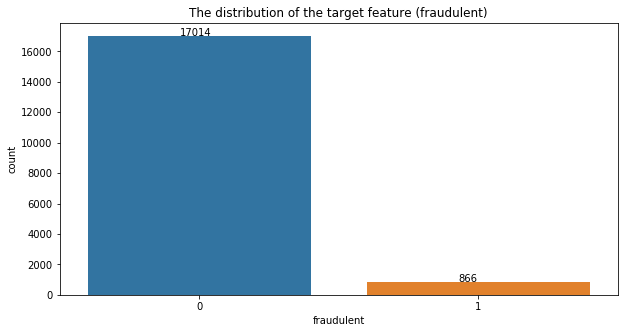

In [206]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_NaN_Mode_Median.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

# OverSampling Method Using SMOTE 

In [207]:
smk  = SMOTETomek(random_state=42)
X_NaN_Mode_Median_res,Y_NaN_Mode_Median_res= smk.fit_sample(df_NaN_Mode_Median_minmax, y_NaN_Mode_Median)

In [208]:
print(X_NaN_Mode_Median_res.shape)
print(Y_NaN_Mode_Median_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median_res, X_test_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, y_test_NaN_Mode_Median_res = train_test_split(X_NaN_Mode_Median_res, Y_NaN_Mode_Median_res)
X_train_NaN_Mode_Median_res, X_validation_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, y_validation_NaN_Mode_Median_res = train_test_split(X_train_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_Median_res.shape)
print(X_test_NaN_Mode_Median_res.shape)
print(X_validation_NaN_Mode_Median_res.shape)

(34010, 113)
(34010,)
(20405, 113)
(8503, 113)
(5102, 113)


In [209]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_Median_res.fit(X_train_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res)
print_score(rf_NaN_Mode_Median_res, X_train_NaN_Mode_Median_res, X_validation_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, y_validation_NaN_Mode_Median_res, train=True)
print_score(rf_NaN_Mode_Median_res, X_train_NaN_Mode_Median_res, X_validation_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, y_validation_NaN_Mode_Median_res, train=False)


Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10201
           1       1.00      1.00      1.00     10204

    accuracy                           1.00     20405
   macro avg       1.00      1.00      1.00     20405
weighted avg       1.00      1.00      1.00     20405


Confusion Matrix: 
 [[10199     2]
 [    1 10203]]

ROC AUC: 0.9999

Average Accuracy: 	 0.9884
Accuracy SD: 		 0.0014

Test Result:

accuracy score: 0.9904

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2546
           1       0.99      0.99      0.99      2556

    accuracy                           0.99      5102
   macro avg       0.99      0.99      0.99      5102
weighted avg       0.99      0.99      0.99      5102


Confusion Matrix: 
 [[2517   29]
 [  20 2536]]

ROC AUC: 0.9904



# Adaptive Synthetic Sampling (ADASYN)

In [211]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_NaN_Mode_Median_res1,Y_NaN_Mode_Median_res1= adasyn.fit_sample(df_NaN_Mode_Median_minmax, y_NaN_Mode_Median)


In [212]:
print(X_NaN_Mode_Median_res1.shape)
print(Y_NaN_Mode_Median_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median_res1, X_test_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, y_test_NaN_Mode_Median_res1 = train_test_split(X_NaN_Mode_Median_res1, Y_NaN_Mode_Median_res1)
X_train_NaN_Mode_Median_res1, X_validation_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, y_validation_NaN_Mode_Median_res1 = train_test_split(X_train_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_Median_res1.shape)
print(X_test_NaN_Mode_Median_res1.shape)
print(X_validation_NaN_Mode_Median_res1.shape)

(34034, 113)
(34034,)
(20420, 113)
(8509, 113)
(5105, 113)


In [213]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_Median_res1.fit(X_train_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1)
print_score(rf_NaN_Mode_Median_res1, X_train_NaN_Mode_Median_res1, X_validation_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, y_validation_NaN_Mode_Median_res1, train=True)
print_score(rf_NaN_Mode_Median_res1, X_train_NaN_Mode_Median_res1, X_validation_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, y_validation_NaN_Mode_Median_res1, train=False)


Train Result:

accuracy score: 0.9998

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10208
           1       1.00      1.00      1.00     10212

    accuracy                           1.00     20420
   macro avg       1.00      1.00      1.00     20420
weighted avg       1.00      1.00      1.00     20420


Confusion Matrix: 
 [[10205     3]
 [    2 10210]]

ROC AUC: 0.9998

Average Accuracy: 	 0.9893
Accuracy SD: 		 0.0034

Test Result:

accuracy score: 0.9902

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2529
           1       0.99      1.00      0.99      2576

    accuracy                           0.99      5105
   macro avg       0.99      0.99      0.99      5105
weighted avg       0.99      0.99      0.99      5105


Confusion Matrix: 
 [[2491   38]
 [  12 2564]]

ROC AUC: 0.9902



#  ------>Technique: Replacing NaN values with ffill()

In [236]:
df_NaN_ffill=df.copy()
print(df_NaN_ffill.isna().sum())

abroad            0
account           0
admin             0
administr         0
agent             0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64


In [237]:
df_NaN_ffill.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,NaN,NaN,Marketing,0,NaN,NaN,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NZ,NaN,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,US,FL,Fort Worth


In [238]:
df_NaN_ffill=df_NaN_ffill.ffill()
df_NaN_ffill.isna().sum()

abroad        0
account       0
admin         0
administr     0
agent         0
             ..
min_salary    6
max_salary    6
country       0
state         0
city          0
Length: 114, dtype: int64

In [239]:
df_NaN_ffill.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,NaN,NaN,Marketing,0,NaN,NaN,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NZ,NY,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,US,FL,Fort Worth


In [240]:
df_NaN_ffill['required_education'].fillna(df_NaN_ffill['required_education'].mode()[0], inplace=True)
df_NaN_ffill['industry'].fillna(df_NaN_ffill['industry'].mode()[0], inplace=True)
df_NaN_ffill['min_salary'].fillna(df_NaN_ffill['min_salary'].mode()[0], inplace=True)
df_NaN_ffill['max_salary'].fillna(df_NaN_ffill['max_salary'].mode()[0], inplace=True)
df_NaN_ffill.isna().sum()

abroad        0
account       0
admin         0
administr     0
agent         0
             ..
min_salary    0
max_salary    0
country       0
state         0
city          0
Length: 114, dtype: int64

In [241]:
df_NaN_ffill['fraudulent']=df_NaN_ffill['fraudulent'].astype('category')
df_NaN_ffill.dtypes

abroad        float64
account       float64
admin         float64
administr     float64
agent         float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object

In [242]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_ffill['employment_type'] = lb_make.fit_transform(df_NaN_ffill['employment_type'])
df_NaN_ffill['required_experience'] = lb_make.fit_transform(df_NaN_ffill['required_experience'])
df_NaN_ffill['required_education'] = lb_make.fit_transform(df_NaN_ffill['required_education'])
df_NaN_ffill['industry'] = lb_make.fit_transform(df_NaN_ffill['industry'])
df_NaN_ffill['function'] = lb_make.fit_transform(df_NaN_ffill['function'])
df_NaN_ffill['country'] = lb_make.fit_transform(df_NaN_ffill['required_education'])
df_NaN_ffill['state'] = lb_make.fit_transform(df_NaN_ffill['industry'])
df_NaN_ffill['city'] = lb_make.fit_transform(df_NaN_ffill['function'])
df_NaN_ffill.head() #Results in appending a new column to df

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,1,58,22,0,0.0,50000.0,1,58,22
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1,75,7,0,0.0,50000.0,1,75,7
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1,75,7,0,0.0,50000.0,1,75,7
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,22,31,0,0.0,50000.0,1,22,31
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,51,16,0,0.0,50000.0,1,51,16


In [243]:
X_NaN_ffill = df_NaN_ffill.drop(['fraudulent'], axis=1)
X_col_NaN_ffill = X_NaN_ffill.columns
y_NaN_ffill = df_NaN_ffill['fraudulent']

In [244]:
from sklearn.model_selection import train_test_split
X_train_NaN_ffill, X_test_NaN_ffill, y_train_NaN_ffill, y_test_NaN_ffill = train_test_split(X_NaN_ffill, y_NaN_ffill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_ffill, X_validation_NaN_ffill, y_train_NaN_ffill, y_validation_NaN_ffill = train_test_split(X_train_NaN_ffill, y_train_NaN_ffill,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on data of which NaN values replaced with ffill

In [223]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill = RandomForestClassifier(n_estimators=100)
rf_NaN_ffill.fit(X_train_NaN_ffill, y_train_NaN_ffill)
print_score(rf_NaN_ffill, X_train_NaN_ffill, X_validation_NaN_ffill, y_train_NaN_ffill, y_validation_NaN_ffill, train=True)
print_score(rf_NaN_ffill, X_train_NaN_ffill, X_validation_NaN_ffill, y_train_NaN_ffill, y_validation_NaN_ffill, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9695
Accuracy SD: 		 0.0026

Test Result:

accuracy score: 0.9769

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.97      0.59      0.73       152

    accuracy                           0.98      2861
   macro avg       0.97      0.79      0.86      2861
weighted avg       0.98      0.98      0.97      2861


Confusion Matrix: 
 [[2706    3]
 [  63   89]]

ROC AUC: 0.7922



# ----->Technique: Standard Scalar on dataset whose all NaN values are replaced with ffill()

In [245]:
from sklearn.preprocessing import StandardScaler
X_NaN_ffill_scaler = StandardScaler().fit_transform(X_NaN_ffill.values)
df_NaN_ffill_scaler = pd.DataFrame(X_NaN_ffill_scaler, columns=X_col_NaN_ffill)
df_NaN_ffill_scaler.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,1.327532,0.418524,-0.640827,0.159615,0.588546,-0.033891,-0.032627,-0.640827,0.159615,0.588546
1,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.107291,1.342262,-0.640827,0.724036,-1.004511,-0.033891,-0.032627,-0.640827,0.724036,-1.004511
2,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.107291,1.342262,-0.640827,0.724036,-1.004511,-0.033891,-0.032627,-0.640827,0.724036,-1.004511
3,-0.198573,4.816341,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.107291,0.880393,-0.640827,-1.035630,1.544380,-0.033891,-0.032627,-0.640827,-1.035630,1.544380
4,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.107291,0.880393,-0.640827,-0.072794,-0.048677,-0.033891,-0.032627,-0.640827,-0.072794,-0.048677


In [246]:
from sklearn.model_selection import train_test_split
X_train_NaN_ffill1, X_test_NaN_ffill1, y_train_NaN_ffill1, y_test_NaN_ffill1 = train_test_split(df_NaN_ffill_scaler, y_NaN_ffill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_ffill1, X_validation_NaN_ffill1, y_train_NaN_ffill1, y_validation_NaN_ffill1 = train_test_split(X_train_NaN_ffill1, y_train_NaN_ffill1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with ffill, scaled using StandardScaler.

In [247]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill1 = RandomForestClassifier(n_estimators=100)
rf_NaN_ffill1.fit(X_train_NaN_ffill1, y_train_NaN_ffill1)
print_score(rf_NaN_ffill1, X_train_NaN_ffill1, X_validation_NaN_ffill1, y_train_NaN_ffill1, y_validation_NaN_ffill1, train=True)
print_score(rf_NaN_ffill1, X_train_NaN_ffill1, X_validation_NaN_ffill1, y_train_NaN_ffill1, y_validation_NaN_ffill1, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9699
Accuracy SD: 		 0.0023

Test Result:

accuracy score: 0.9748

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.95      0.55      0.70       152

    accuracy                           0.97      2861
   macro avg       0.97      0.78      0.84      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2705    4]
 [  68   84]]

ROC AUC: 0.7756



# ------> Technique: Min max Scalar on dataset whose all NaN values are replaced with ffill()

In [248]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_ffill_minmax = MinMaxScaler().fit_transform(df_NaN_ffill_scaler.values)
df_NaN_ffill_minmax = pd.DataFrame(X_NaN_ffill_minmax, columns=X_col_NaN_ffill)
df_NaN_ffill_minmax.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.666667,0.090909,0.446154,0.611111,0.0,0.000042,0.090909,0.446154,0.611111
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.000000,0.090909,0.576923,0.194444,0.0,0.000042,0.090909,0.576923,0.194444
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.000000,0.090909,0.576923,0.194444,0.0,0.000042,0.090909,0.576923,0.194444
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.169231,0.861111,0.0,0.000042,0.090909,0.169231,0.861111
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.392308,0.444444,0.0,0.000042,0.090909,0.392308,0.444444


In [249]:
from sklearn.model_selection import train_test_split
X_train_NaN_ffill2, X_test_NaN_ffill2, y_train_NaN_ffill2, y_test_NaN_ffill2 = train_test_split(df_NaN_ffill_minmax, y_NaN_ffill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_ffill2, X_validation_NaN_ffill2, y_train_NaN_ffill2, y_validation_NaN_ffill2 = train_test_split(X_train_NaN_ffill2, y_train_NaN_ffill2,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with ffill, scaled using MinMaxScaler.

In [250]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill2 = RandomForestClassifier(n_estimators=100)
rf_NaN_ffill2.fit(X_train_NaN_ffill2, y_train_NaN_ffill2)
print_score(rf_NaN_ffill2, X_train_NaN_ffill2, X_validation_NaN_ffill2, y_train_NaN_ffill2, y_validation_NaN_ffill2, train=True)
print_score(rf_NaN_ffill2, X_train_NaN_ffill2, X_validation_NaN_ffill2, y_train_NaN_ffill2, y_validation_NaN_ffill2, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9699
Accuracy SD: 		 0.0026

Test Result:

accuracy score: 0.9752

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.97      0.55      0.70       152

    accuracy                           0.98      2861
   macro avg       0.97      0.78      0.84      2861
weighted avg       0.97      0.98      0.97      2861


Confusion Matrix: 
 [[2706    3]
 [  68   84]]

ROC AUC: 0.7758



# ------->Technique: Binarize Data (Make Binary)  value>0 => 1 ,  value<0 => 0    

In [230]:
from sklearn.preprocessing import Binarizer
X_NaN_ffill_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_ffill.values)
df_NaN_ffill_binary = pd.DataFrame(X_NaN_ffill_binary, columns=X_col_NaN_ffill)
df_NaN_ffill_binary.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [231]:
from sklearn.model_selection import train_test_split
X_train_NaN_ffill3, X_test_NaN_ffill3, y_train_NaN_ffill3, y_test_NaN_ffill3 = train_test_split(df_NaN_ffill_binary, y_NaN_ffill,
                                                    train_size=0.8, random_state=42)
X_train_NaN_ffill3, X_validation_NaN_ffill3, y_train_NaN_ffill3, y_validation_NaN_ffill3 = train_test_split(X_train_NaN_ffill3, y_train_NaN_ffill3,
                                                    train_size=0.8, random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with ffill, scaled using Binarizer.

In [232]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill3 = RandomForestClassifier(n_estimators=100)
rf_NaN_ffill3.fit(X_train_NaN_ffill3, y_train_NaN_ffill3)
print_score(rf_NaN_ffill3, X_train_NaN_ffill3, X_validation_NaN_ffill3, y_train_NaN_ffill3, y_validation_NaN_ffill3, train=True)
print_score(rf_NaN_ffill3, X_train_NaN_ffill3, X_validation_NaN_ffill3, y_train_NaN_ffill3, y_validation_NaN_ffill3, train=False)

Train Result:

accuracy score: 0.9825

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10910
           1       0.93      0.67      0.78       533

    accuracy                           0.98     11443
   macro avg       0.96      0.84      0.89     11443
weighted avg       0.98      0.98      0.98     11443


Confusion Matrix: 
 [[10884    26]
 [  174   359]]

ROC AUC: 0.8356

Average Accuracy: 	 0.9621
Accuracy SD: 		 0.0050

Test Result:

accuracy score: 0.9636

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.74      0.48      0.58       152

    accuracy                           0.96      2861
   macro avg       0.86      0.74      0.78      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2684   25]
 [  79   73]]

ROC AUC: 0.7355



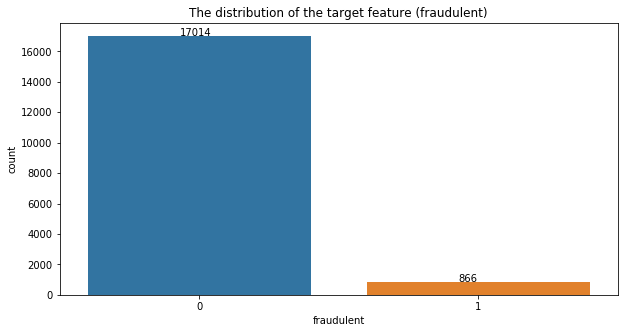

In [252]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_NaN_ffill.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))


# OverSampling Method Using SMOTE 

In [253]:

smk = SMOTETomek(random_state=42)
X_NaN_ffill_res,Y_NaN_ffill_res= smk.fit_sample(df_NaN_ffill_minmax, y_NaN_ffill)


In [254]:
print(X_NaN_ffill_res.shape)
print(Y_NaN_ffill_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_ffill_res, X_test_NaN_ffill_res, y_train_NaN_ffill_res, y_test_NaN_ffill_res = train_test_split(X_NaN_ffill_res, Y_NaN_ffill_res)
X_train_NaN_ffill_res, X_validation_NaN_ffill_res, y_train_NaN_ffill_res, y_validation_NaN_ffill_res = train_test_split(X_train_NaN_ffill_res, y_train_NaN_ffill_res, train_size=0.8, random_state=42)
print(X_train_NaN_ffill_res.shape)
print(X_test_NaN_ffill_res.shape)
print(X_validation_NaN_ffill_res.shape)

(33984, 113)
(33984,)
(20390, 113)
(8496, 113)
(5098, 113)


In [255]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_ffill_res.fit(X_train_NaN_ffill_res, y_train_NaN_ffill_res)
print_score(rf_NaN_ffill_res, X_train_NaN_ffill_res, X_validation_NaN_ffill_res, y_train_NaN_ffill_res, y_validation_NaN_ffill_res, train=True)
print_score(rf_NaN_ffill_res, X_train_NaN_ffill_res, X_validation_NaN_ffill_res, y_train_NaN_ffill_res, y_validation_NaN_ffill_res, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10205
           1       1.00      1.00      1.00     10185

    accuracy                           1.00     20390
   macro avg       1.00      1.00      1.00     20390
weighted avg       1.00      1.00      1.00     20390


Confusion Matrix: 
 [[10205     0]
 [    0 10185]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9842
Accuracy SD: 		 0.0018

Test Result:

accuracy score: 0.9831

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2532
           1       0.98      0.98      0.98      2566

    accuracy                           0.98      5098
   macro avg       0.98      0.98      0.98      5098
weighted avg       0.98      0.98      0.98      5098


Confusion Matrix: 
 [[2486   46]
 [  40 2526]]

ROC AUC: 0.9831



# Adaptive Synthetic Sampling (ADASYN)

In [257]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_NaN_ffill_res1,Y_NaN_ffill_res1= adasyn.fit_sample(df_NaN_ffill_minmax, y_NaN_ffill)


In [258]:
print(X_NaN_ffill_res1.shape)
print(Y_NaN_ffill_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_ffill_res1, X_test_NaN_ffill_res1, y_train_NaN_ffill_res1, y_test_NaN_ffill_res1 = train_test_split(X_NaN_ffill_res1, Y_NaN_ffill_res1)
X_train_NaN_ffill_res1, X_validation_NaN_ffill_res1, y_train_NaN_ffill_res1, y_validation_NaN_ffill_res1 = train_test_split(X_train_NaN_ffill_res1, y_train_NaN_ffill_res1, train_size=0.8, random_state=42)
print(X_train_NaN_ffill_res1.shape)
print(X_test_NaN_ffill_res1.shape)
print(X_validation_NaN_ffill_res1.shape)

(33997, 113)
(33997,)
(20397, 113)
(8500, 113)
(5100, 113)


In [259]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_ffill_res1.fit(X_train_NaN_ffill_res1, y_train_NaN_ffill_res1)
print_score(rf_NaN_ffill_res1, X_train_NaN_ffill_res1, X_validation_NaN_ffill_res1, y_train_NaN_ffill_res1, y_validation_NaN_ffill_res1, train=True)
print_score(rf_NaN_ffill_res1, X_train_NaN_ffill_res1, X_validation_NaN_ffill_res1, y_train_NaN_ffill_res1, y_validation_NaN_ffill_res1, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10168
           1       1.00      1.00      1.00     10229

    accuracy                           1.00     20397
   macro avg       1.00      1.00      1.00     20397
weighted avg       1.00      1.00      1.00     20397


Confusion Matrix: 
 [[10168     0]
 [    0 10229]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9845
Accuracy SD: 		 0.0017

Test Result:

accuracy score: 0.9855

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2567
           1       0.98      0.99      0.99      2533

    accuracy                           0.99      5100
   macro avg       0.99      0.99      0.99      5100
weighted avg       0.99      0.99      0.99      5100


Confusion Matrix: 
 [[2528   39]
 [  35 2498]]

ROC AUC: 0.9855



# ------>Technique : Replacing NaN values with bfill

In [262]:
df_NaN_bfill=df.copy()

In [263]:
df_NaN_bfill.isna().sum()

abroad            0
account           0
admin             0
administr         0
agent             0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

In [264]:
df_NaN_bfill.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,NaN,NaN,Marketing,0,NaN,NaN,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN,NaN,NZ,NaN,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN,NaN,US,FL,Fort Worth


In [265]:
df_NaN_bfill=df_NaN_bfill.bfill()
df_NaN_bfill.isna().sum()

abroad        0
account       0
admin         0
administr     0
agent         0
             ..
min_salary    5
max_salary    5
country       0
state         0
city          0
Length: 114, dtype: int64

In [266]:
df_NaN_bfill.tail()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
17875,0.0,0.677457,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,NaN,NaN,CA,ON,Toronto
17876,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,NaN,NaN,US,PA,Philadelphia
17877,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Not Applicable,Professional,Graphic Design,Design,0,NaN,NaN,US,TX,Houston
17878,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,Not Applicable,Professional,Graphic Design,Design,0,NaN,NaN,NG,LA,Lagos
17879,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.714454,0.0,0.0,...,Mid-Senior level,NaN,Computer Software,Engineering,0,NaN,NaN,NZ,N,Wellington


In [267]:
df_NaN_bfill['required_education'].fillna(df_NaN_bfill['required_education'].mode()[0], inplace=True)
df_NaN_bfill['min_salary'].fillna(df_NaN_bfill['min_salary'].mode()[0], inplace=True)
df_NaN_bfill['max_salary'].fillna(df_NaN_bfill['max_salary'].mode()[0], inplace=True)
df_NaN_bfill.isna().sum()


abroad        0
account       0
admin         0
administr     0
agent         0
             ..
min_salary    0
max_salary    0
country       0
state         0
city          0
Length: 114, dtype: int64

In [268]:
df_NaN_ffill['fraudulent']=df_NaN_ffill['fraudulent'].astype('category')
df_NaN_ffill.dtypes

abroad        float64
account       float64
admin         float64
administr     float64
agent         float64
               ...   
min_salary    float64
max_salary    float64
country         int64
state           int64
city            int64
Length: 114, dtype: object

In [269]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_bfill['employment_type'] = lb_make.fit_transform(df_NaN_bfill['employment_type'])
df_NaN_bfill['required_experience'] = lb_make.fit_transform(df_NaN_bfill['required_experience'])
df_NaN_bfill['required_education'] = lb_make.fit_transform(df_NaN_bfill['required_education'])
df_NaN_bfill['industry'] = lb_make.fit_transform(df_NaN_bfill['industry'])
df_NaN_bfill['function'] = lb_make.fit_transform(df_NaN_bfill['function'])
df_NaN_bfill['country'] = lb_make.fit_transform(df_NaN_bfill['country'])
df_NaN_bfill['state'] = lb_make.fit_transform(df_NaN_bfill['state'])
df_NaN_bfill['city'] = lb_make.fit_transform(df_NaN_bfill['city'])
df_NaN_bfill.head() #Results in appending a new column to df

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,1,75,22,0,20000.0,28000.0,85,227,1457
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1,75,7,0,20000.0,28000.0,60,155,188
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,22,31,0,20000.0,28000.0,85,155,2212
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,22,31,0,20000.0,28000.0,85,104,2163
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,51,16,0,20000.0,28000.0,85,130,786


In [270]:
X_NaN_bfill = df_NaN_bfill.drop(['fraudulent'], axis=1)
X_col_NaN_bfill = X_NaN_bfill.columns
y_NaN_bfill = df_NaN_bfill['fraudulent']

In [271]:
from sklearn.model_selection import train_test_split
X_train_NaN_bfill, X_test_NaN_bfill, y_train_NaN_bfill, y_test_NaN_bfill = train_test_split(X_NaN_bfill, y_NaN_bfill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_bfill, X_validation_NaN_bfill, y_train_NaN_bfill, y_validation_NaN_bfill = train_test_split(X_train_NaN_bfill, y_train_NaN_bfill,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on data of which NaN values replaced with bfill

In [272]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill = RandomForestClassifier(n_estimators=100)
rf_NaN_bfill.fit(X_train_NaN_bfill, y_train_NaN_bfill)
print_score(rf_NaN_bfill, X_train_NaN_bfill, X_validation_NaN_bfill, y_train_NaN_bfill, y_validation_NaN_bfill, train=True)
print_score(rf_NaN_bfill, X_train_NaN_bfill, X_validation_NaN_bfill, y_train_NaN_bfill, y_validation_NaN_bfill, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9726
Accuracy SD: 		 0.0037

Test Result:

accuracy score: 0.9731

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.97      0.51      0.67       152

    accuracy                           0.97      2861
   macro avg       0.97      0.75      0.83      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2707    2]
 [  75   77]]

ROC AUC: 0.7529



# -----> Technique: Standard Scalar on dataset whose all NaN values are replaced with bfill()

In [273]:
from sklearn.preprocessing import StandardScaler
X_NaN_bfill_scaler = StandardScaler().fit_transform(X_NaN_bfill.values)
df_NaN_bfill_scaler = pd.DataFrame(X_NaN_bfill_scaler, columns=X_col_NaN_bfill)
df_NaN_bfill_scaler.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,1.337330,0.417783,-0.633333,0.717647,0.595885,-0.03996,-0.040512,0.742968,0.678270,0.461999
1,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.102339,1.341883,-0.633333,0.717647,-0.991563,-0.03996,-0.040512,-0.140960,-0.261536,-1.462564
2,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.102339,0.879833,-0.633333,-1.034572,1.548353,-0.03996,-0.040512,0.742968,-0.261536,1.607030
3,-0.198573,4.816341,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.102339,0.879833,-0.633333,-1.034572,1.548353,-0.03996,-0.040512,0.742968,-0.927232,1.532717
4,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.102339,0.879833,-0.633333,-0.075810,-0.039094,-0.03996,-0.040512,0.742968,-0.587858,-0.555639


In [274]:
from sklearn.model_selection import train_test_split
X_train_NaN_bfill1, X_test_NaN_bfill1, y_train_NaN_bfill1, y_test_NaN_bfill1 = train_test_split(df_NaN_bfill_scaler, y_NaN_bfill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_bfill1, X_validation_NaN_bfill1, y_train_NaN_bfill1, y_validation_NaN_bfill1 = train_test_split(X_train_NaN_bfill1, y_train_NaN_bfill1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with bfill, scaled using StandardScaler.

In [275]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill1 = RandomForestClassifier(n_estimators=100)
rf_NaN_bfill1.fit(X_train_NaN_bfill1, y_train_NaN_bfill1)
print_score(rf_NaN_bfill1, X_train_NaN_bfill1, X_validation_NaN_bfill1, y_train_NaN_bfill1, y_validation_NaN_bfill1, train=True)
print_score(rf_NaN_bfill1, X_train_NaN_bfill1, X_validation_NaN_bfill1, y_train_NaN_bfill1, y_validation_NaN_bfill1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9727
Accuracy SD: 		 0.0037

Test Result:

accuracy score: 0.9734

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.51      0.67       152

    accuracy                           0.97      2861
   macro avg       0.98      0.75      0.83      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  75   77]]

ROC AUC: 0.7531



# -----> Technique: MinMax Scalar on dataset whose all NaN values are replaced with bfill()

In [276]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_bfill_minmax = MinMaxScaler().fit_transform(df_NaN_bfill_scaler.values)
df_NaN_bfill_minmax = pd.DataFrame(X_NaN_bfill_minmax, columns=X_col_NaN_bfill)
df_NaN_bfill_minmax.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.666667,0.090909,0.576923,0.611111,0.000025,0.000023,0.955056,0.702786,0.610645
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.000000,0.090909,0.576923,0.194444,0.000025,0.000023,0.674157,0.479876,0.078793
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.169231,0.861111,0.000025,0.000023,0.955056,0.479876,0.927075
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.169231,0.861111,0.000025,0.000023,0.955056,0.321981,0.906538
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.392308,0.444444,0.000025,0.000023,0.955056,0.402477,0.329422


In [277]:
from sklearn.model_selection import train_test_split
X_train_NaN_bfill2, X_test_NaN_bfill2, y_train_NaN_bfill2, y_test_NaN_bfill2 = train_test_split(df_NaN_bfill_minmax, y_NaN_bfill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_bfill2, X_validation_NaN_bfill2, y_train_NaN_bfill2, y_validation_NaN_bfill2 = train_test_split(X_train_NaN_bfill2, y_train_NaN_bfill2,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with bfill, scaled using MinMaxScaler.

In [278]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill2 = RandomForestClassifier(n_estimators=100)
rf_NaN_bfill2.fit(X_train_NaN_bfill2, y_train_NaN_bfill2)
print_score(rf_NaN_bfill2, X_train_NaN_bfill2, X_validation_NaN_bfill2, y_train_NaN_bfill2, y_validation_NaN_bfill2, train=True)
print_score(rf_NaN_bfill2, X_train_NaN_bfill2, X_validation_NaN_bfill2, y_train_NaN_bfill2, y_validation_NaN_bfill2, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9729
Accuracy SD: 		 0.0031

Test Result:

accuracy score: 0.9727

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.96      0.51      0.66       152

    accuracy                           0.97      2861
   macro avg       0.97      0.75      0.82      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2706    3]
 [  75   77]]

ROC AUC: 0.7527



# -------> Technique: Binarize Data (Make Binary)  value>0 => 1 ,  value<0 => 0    

In [279]:
from sklearn.preprocessing import Binarizer
X_NaN_bfill_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_bfill.values)
df_NaN_bfill_binary = pd.DataFrame(X_NaN_bfill_binary, columns=X_col_NaN_bfill)
df_NaN_bfill_binary.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [280]:
from sklearn.model_selection import train_test_split
X_train_NaN_bfill3, X_test_NaN_bfill3, y_train_NaN_bfill3, y_test_NaN_bfill3 = train_test_split(df_NaN_bfill_binary, y_NaN_bfill,
                                                    train_size=0.8, random_state=42)
X_train_NaN_bfill3, X_validation_NaN_bfill3, y_train_NaN_bfill3, y_validation_NaN_bfill3 = train_test_split(X_train_NaN_bfill3, y_train_NaN_bfill3,
                                                    train_size=0.8, random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with ffill, scaled using Binarizer.

In [281]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill3 = RandomForestClassifier(n_estimators=100)
rf_NaN_bfill3.fit(X_train_NaN_bfill3, y_train_NaN_bfill3)
print_score(rf_NaN_bfill3, X_train_NaN_bfill3, X_validation_NaN_bfill3, y_train_NaN_bfill3, y_validation_NaN_bfill3, train=True)
print_score(rf_NaN_bfill3, X_train_NaN_bfill3, X_validation_NaN_bfill3, y_train_NaN_bfill3, y_validation_NaN_bfill3, train=False)

Train Result:

accuracy score: 0.9821

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10910
           1       0.95      0.65      0.77       533

    accuracy                           0.98     11443
   macro avg       0.96      0.83      0.88     11443
weighted avg       0.98      0.98      0.98     11443


Confusion Matrix: 
 [[10890    20]
 [  185   348]]

ROC AUC: 0.8255

Average Accuracy: 	 0.9608
Accuracy SD: 		 0.0030

Test Result:

accuracy score: 0.9602

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.70      0.43      0.54       152

    accuracy                           0.96      2861
   macro avg       0.84      0.71      0.76      2861
weighted avg       0.95      0.96      0.96      2861


Confusion Matrix: 
 [[2681   28]
 [  86   66]]

ROC AUC: 0.7119



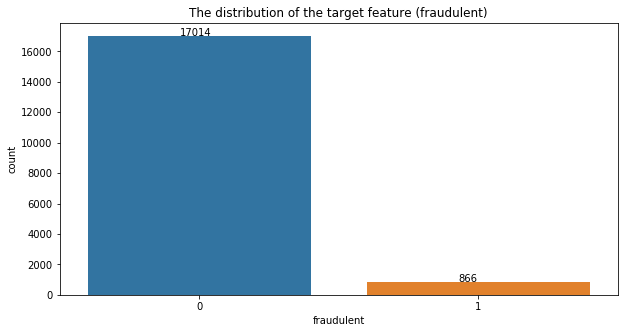

In [283]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_NaN_ffill.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))


# OverSampling Method Using SMOTE 

In [285]:
smk  = SMOTETomek(random_state=42)
X_NaN_bfill_res,Y_NaN_bfill_res= smk.fit_sample(df_NaN_bfill_scaler,  y_NaN_bfill)

In [286]:
print(X_NaN_bfill_res.shape)
print(Y_NaN_bfill_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_bfill_res, X_test_NaN_bfill_res, y_train_NaN_bfill_res, y_test_NaN_bfill_res = train_test_split(X_NaN_bfill_res, Y_NaN_bfill_res)
X_train_NaN_bfill_res, X_validation_NaN_bfill_res, y_train_NaN_bfill_res, y_validation_NaN_bfill_res = train_test_split(X_train_NaN_bfill_res, y_train_NaN_bfill_res, train_size=0.8, random_state=42)
print(X_train_NaN_bfill_res.shape)
print(X_test_NaN_bfill_res.shape)
print(X_validation_NaN_bfill_res.shape)

(34024, 113)
(34024,)
(20414, 113)
(8506, 113)
(5104, 113)


In [287]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_bfill_res.fit(X_train_NaN_bfill_res, y_train_NaN_bfill_res)
print_score(rf_NaN_bfill_res, X_train_NaN_bfill_res, X_validation_NaN_bfill_res, y_train_NaN_bfill_res, y_validation_NaN_bfill_res, train=True)
print_score(rf_NaN_bfill_res, X_train_NaN_ffill_res, X_validation_NaN_bfill_res, y_train_NaN_bfill_res, y_validation_NaN_bfill_res, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10266
           1       1.00      1.00      1.00     10148

    accuracy                           1.00     20414
   macro avg       1.00      1.00      1.00     20414
weighted avg       1.00      1.00      1.00     20414


Confusion Matrix: 
 [[10266     0]
 [    0 10148]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9872
Accuracy SD: 		 0.0020

Test Result:

accuracy score: 0.9877

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2532
           1       0.99      0.99      0.99      2572

    accuracy                           0.99      5104
   macro avg       0.99      0.99      0.99      5104
weighted avg       0.99      0.99      0.99      5104


Confusion Matrix: 
 [[2497   35]
 [  28 2544]]

ROC AUC: 0.9876



# Adaptive Synthetic Sampling (ADASYN)

In [288]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_NaN_bfill_res1,Y_NaN_bfill_res1= adasyn.fit_sample(df_NaN_bfill_minmax, y_NaN_bfill)

In [289]:
print(X_NaN_bfill_res1.shape)
print(Y_NaN_bfill_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_bfill_res1, X_test_NaN_bfill_res1, y_train_NaN_bfill_res1, y_test_NaN_bfill_res1 = train_test_split(X_NaN_bfill_res1, Y_NaN_bfill_res1)
X_train_NaN_bfill_res1, X_validation_NaN_bfill_res1, y_train_NaN_bfill_res1, y_validation_NaN_bfill_res1 = train_test_split(X_train_NaN_bfill_res1, y_train_NaN_bfill_res1, train_size=0.8, random_state=42)
print(X_train_NaN_bfill_res1.shape)
print(X_test_NaN_bfill_res1.shape)
print(X_validation_NaN_bfill_res1.shape)


(34029, 113)
(34029,)
(20416, 113)
(8508, 113)
(5105, 113)


In [290]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_bfill_res1.fit(X_train_NaN_bfill_res1, y_train_NaN_bfill_res1)
print_score(rf_NaN_bfill_res1, X_train_NaN_bfill_res1, X_validation_NaN_bfill_res1, y_train_NaN_bfill_res1, y_validation_NaN_bfill_res1, train=True)
print_score(rf_NaN_bfill_res1, X_train_NaN_bfill_res1, X_validation_NaN_bfill_res1, y_train_NaN_bfill_res1, y_validation_NaN_bfill_res1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10167
           1       1.00      1.00      1.00     10249

    accuracy                           1.00     20416
   macro avg       1.00      1.00      1.00     20416
weighted avg       1.00      1.00      1.00     20416


Confusion Matrix: 
 [[10167     0]
 [    0 10249]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9883
Accuracy SD: 		 0.0025

Test Result:

accuracy score: 0.9902

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2595
           1       0.99      0.99      0.99      2510

    accuracy                           0.99      5105
   macro avg       0.99      0.99      0.99      5105
weighted avg       0.99      0.99      0.99      5105


Confusion Matrix: 
 [[2562   33]
 [  17 2493]]

ROC AUC: 0.9903



# Filling numerical NaN values using KNNImputer and categorical with mode

In [292]:
df_NaN_imputer=df.copy()
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_NaN_imputer['min_salary']=imp.fit_transform(df_NaN_imputer[['min_salary']]) 
df_NaN_imputer['max_salary']=imp.fit_transform(df_NaN_imputer[['max_salary']]) 

In [293]:
df_NaN_imputer.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,NaN,NaN,Marketing,0,510737.528591,804935.732218,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,510737.528591,804935.732218,NZ,NaN,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,510737.528591,804935.732218,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,510737.528591,804935.732218,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,510737.528591,804935.732218,US,FL,Fort Worth


In [294]:
#categorical
df_NaN_imputer['employment_type'].fillna(df_NaN_imputer['employment_type'].mode()[0], inplace=True)
df_NaN_imputer['required_experience'].fillna(df_NaN_imputer['required_experience'].mode()[0], inplace=True)
df_NaN_imputer['required_education'].fillna(df_NaN_imputer['required_education'].mode()[0], inplace=True)
df_NaN_imputer['industry'].fillna(df_NaN_imputer['industry'].mode()[0], inplace=True)
df_NaN_imputer['function'].fillna(df_NaN_imputer['function'].mode()[0], inplace=True)
df_NaN_imputer['country'].fillna(df_NaN_imputer['country'].mode()[0], inplace=True)
df_NaN_imputer['state'].fillna(df_NaN_imputer['state'].mode()[0], inplace=True)
df_NaN_imputer['city'].fillna(df_NaN_imputer['city'].mode()[0], inplace=True)


In [295]:
df_NaN_imputer.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0,510737.528591,804935.732218,US,NY,New York
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0,510737.528591,804935.732218,NZ,CA,Auckland
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,510737.528591,804935.732218,US,IA,Wever
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,510737.528591,804935.732218,US,DC,Washington
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,510737.528591,804935.732218,US,FL,Fort Worth


In [296]:
df_NaN_imputer.isna().sum().sum()

0

In [297]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_imputer['employment_type'] = lb_make.fit_transform(df_NaN_imputer['employment_type'])
df_NaN_imputer['required_experience'] = lb_make.fit_transform(df_NaN_imputer['required_experience'])
df_NaN_imputer['required_education'] = lb_make.fit_transform(df_NaN_imputer['required_education'])
df_NaN_imputer['industry'] = lb_make.fit_transform(df_NaN_imputer['industry'])
df_NaN_imputer['function'] = lb_make.fit_transform(df_NaN_imputer['function'])
df_NaN_imputer['country'] = lb_make.fit_transform(df_NaN_imputer['country'])
df_NaN_imputer['state'] = lb_make.fit_transform(df_NaN_imputer['state'])
df_NaN_imputer['city'] = lb_make.fit_transform(df_NaN_imputer['city'])
df_NaN_imputer.head() #Results in appending a new column to df

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,required_experience,required_education,industry,function,fraudulent,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,1,58,22,0,510737.528591,804935.732218,85,227,1457
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,1,75,7,0,510737.528591,804935.732218,60,83,188
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,58,18,0,510737.528591,804935.732218,85,155,2212
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,22,31,0,510737.528591,804935.732218,85,104,2163
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,51,16,0,510737.528591,804935.732218,85,130,786


In [298]:
X_NaN_imputer = df_NaN_imputer.drop(['fraudulent'], axis=1)
X_col_NaN_imputer = X_NaN_imputer.columns
y_NaN_imputer = df_NaN_imputer['fraudulent']

In [299]:
from sklearn.model_selection import train_test_split
X_train_NaN_imputer, X_test_NaN_imputer, y_train_NaN_imputer, y_test_NaN_imputer = train_test_split(X_NaN_imputer, y_NaN_imputer,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_imputer, X_validation_NaN_imputer, y_train_NaN_imputer, y_validation_NaN_imputer = train_test_split(X_train_NaN_imputer, y_train_NaN_imputer,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on data of which numerical NaN values replaced with KNN Imputer categorical with mode.

In [300]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer = RandomForestClassifier(n_estimators=100)
rf_NaN_imputer.fit(X_train_NaN_imputer, y_train_NaN_imputer)
print_score(rf_NaN_imputer, X_train_NaN_imputer, X_validation_NaN_imputer, y_train_NaN_imputer, y_validation_NaN_imputer, train=True)
print_score(rf_NaN_imputer, X_train_NaN_imputer, X_validation_NaN_imputer, y_train_NaN_imputer, y_validation_NaN_imputer, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    4   529]]

ROC AUC: 0.9962

Average Accuracy: 	 0.9775
Accuracy SD: 		 0.0045

Test Result:

accuracy score: 0.9794

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.93      0.66      0.77       152

    accuracy                           0.98      2861
   macro avg       0.96      0.83      0.88      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2702    7]
 [  52  100]]

ROC AUC: 0.8277



# -----> Technique: Standard Scalar on dataset whose all numerical NaN values are replaced with KNNImputer() and categorical with mode

In [301]:
from sklearn.preprocessing import StandardScaler
X_NaN_imputer_scaler = StandardScaler().fit_transform(X_NaN_imputer.values)
df_NaN_imputer_scaler = pd.DataFrame(X_NaN_imputer_scaler, columns=X_col_NaN_imputer)
df_NaN_imputer_scaler.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,1.501706,0.081438,-0.398503,0.136639,0.670822,8.253194e-18,0.0,0.732256,0.836076,0.480200
1,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,1.121890,-0.398503,0.797588,-1.320836,8.253194e-18,0.0,-0.155046,-1.010106,-1.567810
2,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,0.136639,0.139713,8.253194e-18,0.0,0.732256,-0.087015,1.698677
3,-0.198573,4.816341,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,-1.263019,1.865816,8.253194e-18,0.0,0.732256,-0.740871,1.619597
4,-0.198573,-0.195015,-0.084779,-0.144346,-0.085632,-0.158604,-0.085529,-0.099628,-0.11455,-0.090739,...,-0.090851,0.601664,-0.398503,-0.135517,-0.125841,8.253194e-18,0.0,0.732256,-0.407533,-0.602712


In [302]:
from sklearn.model_selection import train_test_split
X_train_NaN_imputer1, X_test_NaN_imputer1, y_train_NaN_imputer1, y_test_NaN_imputer1 = train_test_split(df_NaN_imputer_scaler, y_NaN_imputer,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_imputer1, X_validation_NaN_imputer1, y_train_NaN_imputer1, y_validation_NaN_imputer1 = train_test_split(X_train_NaN_imputer1, y_train_NaN_imputer1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which numerical NaN values replaced with KNN Imputer categorical with mode, scaled using StandardScaler.

In [303]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer1 = RandomForestClassifier(n_estimators=100)
rf_NaN_imputer1.fit(X_train_NaN_imputer1, y_train_NaN_imputer1)
print_score(rf_NaN_imputer1, X_train_NaN_imputer1, X_validation_NaN_imputer1, y_train_NaN_imputer1, y_validation_NaN_imputer1, train=True)
print_score(rf_NaN_imputer1, X_train_NaN_imputer1, X_validation_NaN_imputer1, y_train_NaN_imputer1, y_validation_NaN_imputer1, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10909     1]
 [    3   530]]

ROC AUC: 0.9971

Average Accuracy: 	 0.9774
Accuracy SD: 		 0.0047

Test Result:

accuracy score: 0.9811

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.97      0.66      0.79       152

    accuracy                           0.98      2861
   macro avg       0.98      0.83      0.89      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2706    3]
 [  51  101]]

ROC AUC: 0.8317



# -----> Technique: MinMax Scalar on dataset whose all NaN values are replaced with KNNImputer()

In [304]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_imputer_minmax = MinMaxScaler().fit_transform(X_NaN_imputer.values)
df_NaN_imputer_minmax = pd.DataFrame(X_NaN_imputer_minmax, columns=X_col_NaN_imputer)
df_NaN_imputer_minmax.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.666667,0.090909,0.446154,0.611111,0.000638,0.000671,0.955056,0.702786,0.610645
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,1.000000,0.090909,0.576923,0.194444,0.000638,0.000671,0.674157,0.256966,0.078793
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.446154,0.500000,0.000638,0.000671,0.955056,0.479876,0.927075
3,0.0,0.681065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.169231,0.861111,0.000638,0.000671,0.955056,0.321981,0.906538
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.833333,0.090909,0.392308,0.444444,0.000638,0.000671,0.955056,0.402477,0.329422


In [305]:
from sklearn.model_selection import train_test_split
X_train_NaN_imputer2, X_test_NaN_imputer2, y_train_NaN_imputer2, y_test_NaN_imputer2 = train_test_split(df_NaN_imputer_minmax, y_NaN_imputer,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_imputer2, X_validation_NaN_imputer2, y_train_NaN_imputer2, y_validation_NaN_imputer2 = train_test_split(X_train_NaN_imputer2, y_train_NaN_imputer2,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which numerical NaN values replaced with KNNimputer, categorical with mode, scaled using MinMax scalar

In [306]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer2 = RandomForestClassifier(n_estimators=100)
rf_NaN_imputer2.fit(X_train_NaN_imputer2, y_train_NaN_imputer2)
print_score(rf_NaN_imputer2, X_train_NaN_imputer2, X_validation_NaN_imputer2, y_train_NaN_imputer2, y_validation_NaN_imputer2, train=True)
print_score(rf_NaN_imputer2, X_train_NaN_imputer2, X_validation_NaN_imputer2, y_train_NaN_imputer2, y_validation_NaN_imputer2, train=False)

Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      0.99      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10909     1]
 [    3   530]]

ROC AUC: 0.9971

Average Accuracy: 	 0.9774
Accuracy SD: 		 0.0042

Test Result:

accuracy score: 0.9797

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.94      0.66      0.78       152

    accuracy                           0.98      2861
   macro avg       0.96      0.83      0.88      2861
weighted avg       0.98      0.98      0.98      2861


Confusion Matrix: 
 [[2703    6]
 [  52  100]]

ROC AUC: 0.8278



# -------> Technique: Binarize Data (Make Binary)  value>0 => 1 ,  value<0 => 0    

In [307]:
from sklearn.preprocessing import Binarizer
X_NaN_imputer_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_imputer.values)
df_NaN_imputer_binary = pd.DataFrame(X_NaN_imputer_binary, columns=X_col_NaN_imputer)
df_NaN_imputer_binary.head()

,abroad,account,admin,administr,agent,analyst,android,applic,apprenticeship,architect,...,employment_type,required_experience,required_education,industry,function,min_salary,max_salary,country,state,city
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [308]:
from sklearn.model_selection import train_test_split
X_train_NaN_imputer3, X_test_NaN_imputer3, y_train_NaN_imputer3, y_test_NaN_imputer3 = train_test_split(df_NaN_imputer_binary, y_NaN_imputer,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_imputer3, X_validation_NaN_imputer3, y_train_NaN_imputer3, y_validation_NaN_imputer3 = train_test_split(X_train_NaN_imputer3, y_train_NaN_imputer3,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which numerical NaN values replaced with KNNimputer, categorical with mode, scaled using Binarizer.

In [309]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer3 = RandomForestClassifier(n_estimators=100)
rf_NaN_imputer3.fit(X_train_NaN_imputer3, y_train_NaN_imputer3)
print_score(rf_NaN_imputer3, X_train_NaN_imputer3, X_validation_NaN_imputer3, y_train_NaN_imputer3, y_validation_NaN_imputer3, train=True)
print_score(rf_NaN_imputer3, X_train_NaN_imputer3, X_validation_NaN_imputer3, y_train_NaN_imputer3, y_validation_NaN_imputer3, train=False)

Train Result:

accuracy score: 0.9797

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     10910
           1       0.92      0.62      0.74       533

    accuracy                           0.98     11443
   macro avg       0.95      0.81      0.86     11443
weighted avg       0.98      0.98      0.98     11443


Confusion Matrix: 
 [[10882    28]
 [  204   329]]

ROC AUC: 0.8073

Average Accuracy: 	 0.9631
Accuracy SD: 		 0.0033

Test Result:

accuracy score: 0.9630

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.73      0.48      0.58       152

    accuracy                           0.96      2861
   macro avg       0.85      0.74      0.78      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2682   27]
 [  79   73]]

ROC AUC: 0.7351



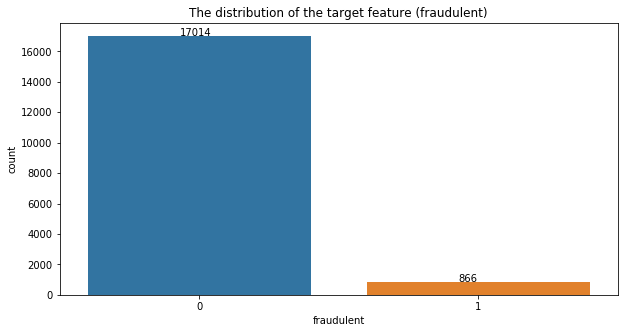

In [310]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_NaN_imputer.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))


# OverSampling Method Using SMOTE 

In [312]:
smk = SMOTETomek(random_state=42)
X_NaN_imputer_res,Y_NaN_imputer_res= smk.fit_sample(df_NaN_imputer_minmax, y_NaN_imputer)

In [313]:
print(X_NaN_imputer_res.shape)
print(Y_NaN_imputer_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_imputer_res, X_test_NaN_imputer_res, y_train_NaN_imputer_res, y_test_NaN_imputer_res = train_test_split(X_NaN_imputer_res, Y_NaN_imputer_res)
X_train_NaN_imputer_res, X_validation_NaN_imputer_res, y_train_NaN_imputer_res, y_validation_NaN_imputer_res = train_test_split(X_train_NaN_imputer_res, y_train_NaN_imputer_res, train_size=0.8, random_state=42)
print(X_train_NaN_imputer_res.shape)
print(X_test_NaN_imputer_res.shape)
print(X_validation_NaN_imputer_res.shape)

(34010, 113)
(34010,)
(20405, 113)
(8503, 113)
(5102, 113)


In [314]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_imputer_res.fit(X_train_NaN_imputer_res, y_train_NaN_imputer_res)
print_score(rf_NaN_imputer_res, X_train_NaN_imputer_res, X_validation_NaN_imputer_res, y_train_NaN_imputer_res, y_validation_NaN_imputer_res, train=True)
print_score(rf_NaN_imputer_res, X_train_NaN_imputer_res, X_validation_NaN_imputer_res, y_train_NaN_imputer_res, y_validation_NaN_imputer_res, train=False)


Train Result:

accuracy score: 0.9997

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10155
           1       1.00      1.00      1.00     10250

    accuracy                           1.00     20405
   macro avg       1.00      1.00      1.00     20405
weighted avg       1.00      1.00      1.00     20405


Confusion Matrix: 
 [[10150     5]
 [    1 10249]]

ROC AUC: 0.9997

Average Accuracy: 	 0.9884
Accuracy SD: 		 0.0023

Test Result:

accuracy score: 0.9875

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2585
           1       0.99      0.99      0.99      2517

    accuracy                           0.99      5102
   macro avg       0.99      0.99      0.99      5102
weighted avg       0.99      0.99      0.99      5102


Confusion Matrix: 
 [[2554   31]
 [  33 2484]]

ROC AUC: 0.9874



# Adaptive Synthetic Sampling (ADASYN)

In [315]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_NaN_imputer_res1,Y_NaN_imputer_res1= adasyn.fit_sample(df_NaN_imputer_minmax, y_NaN_imputer)

In [316]:
print(X_NaN_imputer_res1.shape)
print(Y_NaN_imputer_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_imputer_res1, X_test_NaN_imputer_res1, y_train_NaN_imputer_res1, y_test_NaN_imputer_res1 = train_test_split(X_NaN_imputer_res1, Y_NaN_imputer_res1)
X_train_NaN_imputer_res1, X_validation_NaN_imputer_res1, y_train_NaN_imputer_res1, y_validation_NaN_imputer_res1 = train_test_split(X_train_NaN_imputer_res1, y_train_NaN_imputer_res1, train_size=0.8, random_state=42)
print(X_train_NaN_imputer_res1.shape)
print(X_test_NaN_imputer_res1.shape)
print(X_validation_NaN_imputer_res1.shape)

(34059, 113)
(34059,)
(20435, 113)
(8515, 113)
(5109, 113)


In [317]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_imputer_res1.fit(X_train_NaN_imputer_res1, y_train_NaN_imputer_res1)
print_score(rf_NaN_imputer_res1, X_train_NaN_imputer_res1, X_validation_NaN_imputer_res1, y_train_NaN_imputer_res1, y_validation_NaN_imputer_res1, train=True)
print_score(rf_NaN_imputer_res1, X_train_NaN_imputer_res1, X_validation_NaN_imputer_res1, y_train_NaN_imputer_res1, y_validation_NaN_imputer_res1, train=False)


Train Result:

accuracy score: 0.9996

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10186
           1       1.00      1.00      1.00     10249

    accuracy                           1.00     20435
   macro avg       1.00      1.00      1.00     20435
weighted avg       1.00      1.00      1.00     20435


Confusion Matrix: 
 [[10179     7]
 [    1 10248]]

ROC AUC: 0.9996

Average Accuracy: 	 0.9884
Accuracy SD: 		 0.0015

Test Result:

accuracy score: 0.9883

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2547
           1       0.99      0.99      0.99      2562

    accuracy                           0.99      5109
   macro avg       0.99      0.99      0.99      5109
weighted avg       0.99      0.99      0.99      5109


Confusion Matrix: 
 [[2510   37]
 [  23 2539]]

ROC AUC: 0.9882



# Random Forest classification algorithm on data of Adaptive Synthetic Sampling (ADASYN) Over sampling done on replaced NaN values with Mode and numerical with mean data Scaled using Min Max scalar 